![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/3.SparkNLP_Pretrained_Models.ipynb)

# 3. Spark NLP Pretrained Models

Spark NLP offers the following pre-trained models in 200+ languages and all you need to do is to load the pre-trained model into your disk by specifying the model name and then configuring the model parameters as per your use case and dataset. Then you will not need to worry about training a new model from scratch and will be able to enjoy the pre-trained SOTA algorithms directly applied to your own data with transform().

In the official documentation, you can find detailed information regarding how these models are trained by using which algorithms and datasets.

https://github.com/JohnSnowLabs/spark-nlp-models


![JohnSnowLabs](https://www.johnsnowlabs.com/wp-content/uploads/2021/06/spark_npl_06_2021.png)

## Colab Setup

In [ ]:
!pip install -q pyspark==3.3.0 spark-nlp==4.3.0

In [ ]:
import sparknlp

spark = sparknlp.start()

from sparknlp.base import *
from sparknlp.annotator import *

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 4.3.0
Apache Spark version: 3.3.0


## LemmatizerModel

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
!wget -q -O news_category_test.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv

In [ ]:
import pyspark.sql.functions as F

news_df = spark.read\
                .option("header", "true")\
                .csv("news_category_test.csv")\
                .withColumnRenamed("description", "text")

news_df.show(truncate=50)

+--------+--------------------------------------------------+
|category|                                              text|
+--------+--------------------------------------------------+
|Business|Unions representing workers at Turner   Newall ...|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers...|
|Sci/Tech| A company founded by a chemistry researcher at...|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts ...|
|Sci/Tech| Southern California's smog fighting agency wen...|
|Sci/Tech|"The British Department for Education and Skill...|
|Sci/Tech|"confessed author of the Netsky and Sasser viru...|
|Sci/Tech|\\FOAF/LOAF  and bloom filters have a lot of in...|
|Sci/Tech|"Wiltshire Police warns about ""phishing"" afte...|
|Sci/Tech|In its first two years, the UK's dedicated card...|
|Sci/Tech| A group of technology companies  including Tex...|
|Sci/Tech| Apple Computer Inc.&lt;AAPL.O&gt; on  Tuesday ...|
|Sci/Tech| Free Record Shop, a Dutch music  retail chain,...|
|Sci/Tec

In [ ]:
lemmatizer = LemmatizerModel.pretrained('lemma_antbnc', 'en') \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \

'''
lemmatizer = Lemmatizer() \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \
    .setDictionary("./AntBNC_lemmas_ver_001.txt", value_delimiter ="\t", key_delimiter = "->")
'''

In [ ]:
!cd ~/cache_pretrained && ls -l

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stemmer = Stemmer() \
    .setInputCols(["token"]) \
    .setOutputCol("stem")


nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               stemmer,
                               lemmatizer])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df)

result.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[{document, 0, 12...|[{token, 0, 5, Un...|[{token, 0, 5, un...|[{token, 0, 5, Un...|
|Sci/Tech| TORONTO, Canada ...|[{document, 0, 22...|[{token, 1, 7, TO...|[{token, 1, 7, to...|[{token, 1, 7, TO...|
|Sci/Tech| A company founde...|[{document, 0, 20...|[{token, 1, 1, A,...|[{token, 1, 1, a,...|[{token, 1, 1, A,...|
|Sci/Tech| It's barely dawn...|[{document, 0, 26...|[{token, 1, 4, It...|[{token, 1, 4, it...|[{token, 1, 4, It...|
|Sci/Tech| Southern Califor...|[{document, 0, 17...|[{token, 1, 8, So...|[{token, 1, 8, so...|[{token, 1, 8, So...|
+--------+--------------------+--------------------+--------------------

In [ ]:
result.select('token.result','lemma.result').show(5, truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Unions, representing, workers, at, Turner, Newall, say, they, are, ', disappointed, ', after, ta...|[Unions, represent, worker, at, Turner, Newall, say, they, be, ', disappointed, ', after, talk, w...|
|[TORONTO, ,, Canada, A, second, team, of, rocketeers, competing, for, the, #36;10, million, Ansar...|[TORONTO, ,, Canada, A, second, team, of, rocketeer, compete, for, the, #36;10, mi

## PerceptronModel (POS - Part of speech tags)

In [ ]:
import pandas as pd

pos_df= pd.read_html('https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html', header=0)

pos_df[0]

,Number,Tag,Description
0,1.0,CC,Coordinating conjunction
1,2.0,CD,Cardinal number
2,3.0,DT,Determiner
3,4.0,EX,Existential there
4,5.0,FW,Foreign word
5,6.0,IN,Preposition or subordinating conjunction
6,7.0,JJ,Adjective
7,8.0,JJR,"Adjective, comparative"
8,9.0,JJS,"Adjective, superlative"
9,10.0,LS,List item marker


In [ ]:
pos = PerceptronModel.pretrained("pos_anc", 'en')\
          .setInputCols("document", "token")\
          .setOutputCol("pos")

pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]


In [ ]:
!cd ~/cache_pretrained && ls -l

total 8
drwxr-xr-x 4 root root 4096 Oct  4 18:26 lemma_antbnc_en_2.0.2_2.4_1556480454569
drwxr-xr-x 4 root root 4096 Oct  4 18:34 pos_anc_en_3.0.0_3.0_1614962126490


In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               stemmer,
                               lemmatizer,
                               pos])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df)

result.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|                 pos|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[{document, 0, 12...|[{token, 0, 5, Un...|[{token, 0, 5, un...|[{token, 0, 5, Un...|[{pos, 0, 5, NNP,...|
|Sci/Tech| TORONTO, Canada ...|[{document, 0, 22...|[{token, 1, 7, TO...|[{token, 1, 7, to...|[{token, 1, 7, TO...|[{pos, 1, 7, NNP,...|
|Sci/Tech| A company founde...|[{document, 0, 20...|[{token, 1, 1, A,...|[{token, 1, 1, a,...|[{token, 1, 1, A,...|[{pos, 1, 1, DT, ...|
|Sci/Tech| It's barely dawn...|[{document, 0, 26...|[{token, 1, 4, It...|[{token, 1, 4, it...|[{token, 1, 4, It...|[{pos, 1, 4, NNP,...|
|Sci/Tech| Southern Califor...|[{document

In [ ]:
result.select('token.result','pos.result').show(5, truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Unions, representing, workers, at, Turner, Newall, say, they, are, ', disappointed, ', after, ta...|    [NNP, VBG, NNS, IN, NNP, NNP, VBP, PRP, VBP, POS, JJ, POS, IN, NNS, IN, NN, NN, NN, NNP, NNP, .]|
|[TORONTO, ,, Canada, A, second, team, of, rocketeers, competing, for, the, #36;10, million, Ansar...|[NNP, ,, NNP, DT, JJ, NN, IN, NNS, VBG, IN, DT, NN, CD, NNP, NNP, NNP, ,, DT, NN, 

In [ ]:
# applying this pipeline to top 100 rows and then converting to Pandas

result = pipelineModel.transform(news_df.limit(100))

result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.token.begin, 
                                                 result.token.end, 
                                                 result.stem.result, 
                                                 result.lemma.result, 
                                                 result.pos.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("begin"),
                          F.expr("cols['2']").alias("end"),
                          F.expr("cols['3']").alias("stem"),
                          F.expr("cols['4']").alias("lemma"),
                          F.expr("cols['5']").alias("pos")).toPandas()

result_df.head(10) 

,token,begin,end,stem,lemma,pos
0,Unions,0,5,union,Unions,NNP
1,representing,7,18,repres,represent,VBG
2,workers,20,26,worker,worker,NNS
3,at,28,29,at,at,IN
4,Turner,31,36,turner,Turner,NNP
5,Newall,40,45,newal,Newall,NNP
6,say,47,49,sai,say,VBP
7,they,51,54,thei,they,PRP
8,are,56,58,ar,be,VBP
9,',60,60,',',POS


In [ ]:
# same in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('Unions representing workers at Turner   Newall say they are disappointed after talks with stricken parent firm Federal Mogul.')

list(zip(light_result['token'], light_result['stem'], light_result['lemma'], light_result['pos']))

[('Unions', 'union', 'Unions', 'NNP'),
 ('representing', 'repres', 'represent', 'VBG'),
 ('workers', 'worker', 'worker', 'NNS'),
 ('at', 'at', 'at', 'IN'),
 ('Turner', 'turner', 'Turner', 'NNP'),
 ('Newall', 'newal', 'Newall', 'NNP'),
 ('say', 'sai', 'say', 'VBP'),
 ('they', 'thei', 'they', 'PRP'),
 ('are', 'ar', 'be', 'VBP'),
 ('disappointed', 'disappoint', 'disappointed', 'VBN'),
 ('after', 'after', 'after', 'IN'),
 ('talks', 'talk', 'talk', 'NNS'),
 ('with', 'with', 'with', 'IN'),
 ('stricken', 'stricken', 'stricken', 'NN'),
 ('parent', 'parent', 'parent', 'NN'),
 ('firm', 'firm', 'firm', 'NN'),
 ('Federal', 'feder', 'Federal', 'NNP'),
 ('Mogul', 'mogul', 'Mogul', 'NNP'),
 ('.', '.', '.', '.')]

In [ ]:
pd.DataFrame(list(zip(light_result['token'], light_result['stem'], light_result['lemma'], light_result['pos'])), columns = ['token', 'stem', 'lemma', 'pos'])

,token,stem,lemma,pos
0,Unions,union,Unions,NNP
1,representing,repres,represent,VBG
2,workers,worker,worker,NNS
3,at,at,at,IN
4,Turner,turner,Turner,NNP
5,Newall,newal,Newall,NNP
6,say,sai,say,VBP
7,they,thei,they,PRP
8,are,ar,be,VBP
9,disappointed,disappoint,disappointed,VBN


## **Chunker**

Meaningful phrase matching. This annotator matches a pattern of part-of-speech tags in order to return meaningful phrases from document

> **Output type**: Chunk

> **Input types**: Document, POS

Functions:

🔍`setRegexParsers(patterns)`: A list of regex patterns to match chunks, for example: Array(“‹DT›?‹JJ›*‹NN›

🔍`addRegexParser(patterns)`: adds a pattern to the current list of chunk patterns, for example: “‹DT›?‹JJ›*‹NN›”

In [ ]:
# applying POS chunker to find a custom pattern

chunker = Chunker()\
            .setInputCols(["document", "pos"])\
            .setOutputCol("chunk")\
            .setRegexParsers(["<NNP>+", "<DT>?<JJ>*<NN>"])

# NNP: Proper Noun
# NN: COmmon Noun
# DT: Determinator (e.g. the)
# JJ: Adjective

chunker.extractParamMap()

{Param(parent='Chunker_8572c053a681', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='Chunker_8572c053a681', name='inputCols', doc='previous annotations columns, if renamed'): ['document',
  'pos'],
 Param(parent='Chunker_8572c053a681', name='outputCol', doc='output annotation column. can be left default.'): 'chunk',
 Param(parent='Chunker_8572c053a681', name='regexParsers', doc='an array of grammar based chunk parsers'): ['<NNP>+',
  '<DT>?<JJ>*<NN>']}

In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                              tokenizer,
                              stemmer,
                              lemmatizer,
                              pos,
                              chunker])

result = nlpPipeline.fit(news_df).transform(news_df.limit(100))
result.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|                 pos|               chunk|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[{document, 0, 12...|[{token, 0, 5, Un...|[{token, 0, 5, un...|[{token, 0, 5, Un...|[{pos, 0, 5, NNP,...|[{chunk, 0, 5, Un...|
|Sci/Tech| TORONTO, Canada ...|[{document, 0, 22...|[{token, 1, 7, TO...|[{token, 1, 7, to...|[{token, 1, 7, TO...|[{pos, 1, 7, NNP,...|[{chunk, 1, 7, TO...|
|Sci/Tech| A company founde...|[{document, 0, 20...|[{token, 1, 1, A,...|[{token, 1, 1, a,...|[{token, 1, 1, A,...|[{pos, 1, 1, DT, ...|[{chunk, 52, 61, ...|
|Sci/Tech| It's barely dawn...|[{document, 0, 26...|

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.chunk.result, 
                                                 result.chunk.begin, 
                                                 result.chunk.end)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("chunk"),
                          F.expr("cols['1']").alias("begin"),
                          F.expr("cols['2']").alias("end")).toPandas()

result_df.head(10)

,chunk,begin,end
0,Unions,0,5
1,Turner Newall,31,45
2,Federal Mogul,113,125
3,stricken,92,99
4,parent,101,106
5,firm,108,111
6,TORONTO,1,7
7,Canada,10,15
8,Ansari X Prize,82,95
9,A second team,20,32


## **Dependency Parser**

The practice of analyzing the relationships between sentences in a phrase to ascertain its grammatical structure is known as dependency parsing (DP). Based on this, sentences are frequently broken up into multiple sections. The method is predicated on the idea that each language component in a phrase has a direct link with the others. Dependencies are the names given to these relationships.



In [ ]:
dep_parser = DependencyParserModel.pretrained('dependency_conllu')\
                .setInputCols(["document", "pos", "token"])\
                .setOutputCol("dependency")

dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


In [ ]:
typed_dep_parser = TypedDependencyParserModel.pretrained('dependency_typed_conllu')\
                      .setInputCols(["token", "pos", "dependency"])\
                      .setOutputCol("dependency_type")

dependency_typed_conllu download started this may take some time.
Approximate size to download 2.4 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        stemmer,
        lemmatizer,
        pos,
        dep_parser,
        typed_dep_parser
        ])

result = nlpPipeline.fit(news_df).transform(news_df.limit(100))

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.token.begin, 
                                                 result.token.end, 
                                                 result.dependency.result, 
                                                 result.dependency_type.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("chunk"),
                          F.expr("cols['1']").alias("begin"),
                          F.expr("cols['2']").alias("end"),
                          F.expr("cols['3']").alias("dependency"),
                          F.expr("cols['4']").alias("dependency_type")).toPandas()

result_df.head(10)

,chunk,begin,end,dependency,dependency_type
0,Unions,0,5,ROOT,root
1,representing,7,18,workers,amod
2,workers,20,26,Unions,flat
3,at,28,29,Turner,case
4,Turner,31,36,workers,flat
5,Newall,40,45,say,nsubj
6,say,47,49,Unions,parataxis
7,they,51,54,disappointed,nsubj
8,are,56,58,disappointed,nsubj
9,',60,60,disappointed,case


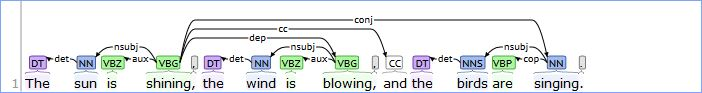

## StopWordsCleaner

`stopwords_fr`, `stopwords_de`, `stopwords_en`, `stopwords_it`, `stopwords_af` .... over 40 languages 

In [ ]:
stopwords_cleaner = StopWordsCleaner.pretrained('stopwords_en','en')\
                        .setInputCols("token")\
                        .setOutputCol("cleanTokens")\
                        .setCaseSensitive(False)

stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]


In [ ]:
# we can also get the list of stopwords 

stopwords_cleaner_es = StopWordsCleaner.pretrained('stopwords_es','es')\
                          .setInputCols("token")\
                          .setOutputCol("cleanTokens")\
                          .setCaseSensitive(False)

stopwords_cleaner_es.getStopWords()[:10]

stopwords_es download started this may take some time.
Approximate size to download 2.2 KB
[OK!]


['a',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'ahi',
 'ahí',
 'ahora',
 'al']

In [ ]:
token_assembler = TokenAssembler() \
                      .setInputCols(["document", "cleanTokens"]) \
                      .setOutputCol("clean_text")


nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        stopwords_cleaner,
        token_assembler
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

# same in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('Peter Parker is a nice person and a friend of mine.')

light_result['clean_text']

['Peter Parker nice person friend mine.']

## **SpellChecker**


### Norvig Spell Checker

This annotator retrieves tokens and makes corrections automatically if not found in an English dictionary

In [ ]:
spell_checker_norvig = NorvigSweetingModel.pretrained('spellcheck_norvig')\
                          .setInputCols("token")\
                          .setOutputCol("corrected")

spellcheck_norvig download started this may take some time.
Approximate size to download 4.2 MB
[OK!]


In [ ]:
from pyspark.sql.types import StringType

text_list = ['Peter Parker is a nice persn and lives in New York.', 
             'Bruce Wayne is also a nice guy and lives in Gotham City.']

spark_df = spark.createDataFrame(text_list, StringType()).toDF("text")

spark_df.show(truncate=False)

+--------------------------------------------------------+
|text                                                    |
+--------------------------------------------------------+
|Peter Parker is a nice persn and lives in New York.     |
|Bruce Wayne is also a nice guy and lives in Gotham City.|
+--------------------------------------------------------+



In [ ]:
nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        stemmer,
        lemmatizer,
        pos,
        spell_checker_norvig
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(spark_df)

In [ ]:
from pyspark.sql import functions as F

result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.corrected.result, 
                                                 result.stem.result, 
                                                 result.lemma.result, 
                                                 result.pos.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("corrected"),
                          F.expr("cols['2']").alias("stem"),
                          F.expr("cols['3']").alias("lemma"),
                          F.expr("cols['4']").alias("pos")).toPandas()

result_df.head(10)

,token,corrected,stem,lemma,pos
0,Peter,Peter,peter,Peter,NNP
1,Parker,Parker,parker,Parker,NNP
2,is,is,i,be,VBZ
3,a,a,a,a,DT
4,nice,nice,nice,nice,JJ
5,persn,person,persn,persn,NN
6,and,and,and,and,CC
7,lives,lives,live,life,NNS
8,in,in,in,in,IN
9,New,New,new,New,NNP


In [ ]:
# same in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('The patint has pain and headace')

list(zip(light_result['token'], light_result['corrected']))

[('The', 'The'),
 ('patint', 'patient'),
 ('has', 'has'),
 ('pain', 'pain'),
 ('and', 'and'),
 ('headace', 'headache')]

### Context SpellChecker

The idea for this annotator is to have a flexible, configurable and "re-usable by parts" model.

Flexibility is the ability to accommodate different use cases for spell checking like OCR text, keyboard-input text, ASR text, and general spelling problems due to orthographic errors.

We say this is a configurable annotator, as you can adapt it yourself to different use cases avoiding re-training as much as possible.

Spell Checking at three levels: The final ranking of a correction sequence is affected by three things,

Different correction candidates for each word - **word level**.

The surrounding text of each word, i.e. it's context - **sentence level**.

The relative cost of different correction candidates according to the edit operations at the character level it requires - **subword level**.

In [ ]:
spellModel = ContextSpellCheckerModel.pretrained('spellcheck_dl')\
    .setInputCols("token")\
    .setOutputCol("checked")

finisher = Finisher()\
    .setInputCols("checked")

pipeline = Pipeline(
    stages = [
        documentAssembler,
        tokenizer,
        spellModel,
        finisher
        ])

empty_ds = spark.createDataFrame([[""]]).toDF("text")

sc_model = pipeline.fit(empty_ds)
lp = LightPipeline(sc_model)

spellcheck_dl download started this may take some time.
Approximate size to download 95.1 MB
[OK!]


In [ ]:
lp.annotate("Plaese alliow me tao introdduce myhelf, I am a man of waelth and tiaste")

{'checked': ['Please',
  'allow',
  'me',
  'to',
  'introduce',
  'myself',
  ',',
  'I',
  'am',
  'a',
  'man',
  'of',
  'wealth',
  'and',
  'taste']}

In [ ]:
from pyspark.sql.types import StringType

examples = ['We will go to swimming if the ueather is sunny.',\
            "I have a black ueather jacket, so nice.",\
            "I introduce you to my sister, she is called ueather."]

spark_df = spark.createDataFrame(examples, StringType()).toDF("text")

results = sc_model.transform(spark_df)
results.show(truncate=False)

+----------------------------------------------------+-------------------------------------------------------------------+
|text                                                |finished_checked                                                   |
+----------------------------------------------------+-------------------------------------------------------------------+
|We will go to swimming if the ueather is sunny.     |[We, will, go, to, swimming, if, the, weather, is, sunny, .]       |
|I have a black ueather jacket, so nice.             |[I, have, a, black, leather, jacket, ,, so, nice, .]               |
|I introduce you to my sister, she is called ueather.|[I, introduce, you, to, my, sister, ,, she, is, called, Heather, .]|
+----------------------------------------------------+-------------------------------------------------------------------+



## **Language Detector**

Language detection and identification is the task of automatically detecting the language(s) present in a document based on the content of the document. `LanguageDetectorDL` is an annotator that detects the language of documents or sentences depending on the inputCols. In addition, LanguageDetetorDL can accurately detect language from documents with mixed languages by coalescing sentences and select the best candidate.

In [ ]:
LanguageDetectorDL().extractParamMap()

{Param(parent='LanguageDetectorDL_bf1972e695d7', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='LanguageDetectorDL_bf1972e695d7', name='threshold', doc='The minimum threshold for the final result otheriwse it will be either neutral or the value set in thresholdLabel.'): 0.5,
 Param(parent='LanguageDetectorDL_bf1972e695d7', name='thresholdLabel', doc='In case the score is less than threshold, what should be the label. Default is neutral.'): 'Unknown',
 Param(parent='LanguageDetectorDL_bf1972e695d7', name='coalesceSentences', doc='If sets to true the output of all sentences will be averaged to one output instead of one output per sentence. Default to false.'): True}

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

languageDetector = LanguageDetectorDL.pretrained("ld_wiki_tatoeba_cnn_375", "xx")\
    .setInputCols("document")\
    .setOutputCol("language")\
    .setThreshold(0.5)\
    .setCoalesceSentences(True)

nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        languageDetector
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

ld_wiki_tatoeba_cnn_375 download started this may take some time.
Approximate size to download 8.8 MB
[OK!]


In [ ]:
light_model = LightPipeline(pipelineModel)


In [ ]:
text_en = "William Henry Gates III (born October 28, 1955) is an American business magnate, software developer, investor, and philanthropist. He is best known as the co-founder of Microsoft Corporation. During his career at Microsoft, Gates held the positions of chairman, chief executive officer (CEO), president and chief software architect, while also being the largest individual shareholder until May 2014."

text_de = 'Als Sebastian Thrun 2007 bei Google anfing, an selbstfahrenden Autos zu arbeiten, nahmen ihn nur wenige Leute außerhalb des Unternehmens ernst.'

text_es = "La historia del procesamiento del lenguaje natural generalmente comenzó en la década de 1950, aunque se puede encontrar trabajo de períodos anteriores. En 1950, Alan Turing publicó un artículo titulado 'Maquinaria de computación e inteligencia' que proponía lo que ahora se llama la prueba de Turing como criterio de inteligencia"

text_it = "Geoffrey Everest Hinton è uno psicologo cognitivo e uno scienziato informatico canadese inglese, noto soprattutto per il suo lavoro sulle reti neurali artificiali. Dal 2013 divide il suo tempo lavorando per Google e l'Università di Toronto. Nel 2017 è stato cofondatore ed è diventato Chief Scientific Advisor del Vector Institute di Toronto."

text_tr = 'Doğal Dil İşleme (NLP), bilgisayar biliminin, insanlar doğal olarak konuşup yazdıkça insan dilini anlamasını sağlayan bilgisayar biliminin alt alanıdır. '

In [ ]:
light_model.annotate(text_tr)['language']

['tr']

In [ ]:
light_model.annotate(text_es)['language']

['es']

In [ ]:
light_model.fullAnnotate(text_es)[0]['language']

[Annotation(language, 0, 328, es, {'avk': '3.2227776E-25', 'toki': '0.0', 'dng': '0.0', 'hy': '0.0', 'bua': '0.0', 'pcd': '1.9255921E-31', 'se': '3.0613954E-33', 'nlv': '0.0', 'ku': '1.6084451E-30', 'gcf': '0.0', 'xmf': '0.0', 'rue': '0.0', 'lou': '0.0', 'crh': '0.0', 'lkt': '0.0', 'oar': '0.0', 'aoz': '0.0', 'ss': '0.0', 'st': '0.0', 'ota': '0.0', 'bs': '7.278714E-36', 'cho': '0.0', 'stq': '0.0', 'kaa': '0.0', 'ba': '0.0', 'ngu': '0.0', 'pfl': '0.0', 'lb': '6.1421093E-24', 'hr': '3.8482914E-28', 'ta': '0.0', 'ka': '0.0', 'ar': '0.0', 'lzz': '0.0', 'swh': '0.0', 'hbo': '0.0', 'pi': '0.0', 'nov': '9.6963065E-25', 'yue': '0.0', 'ty': '0.0', 'fr': '2.2967522E-22', 'lfn': '5.509995E-9', 'is': '1.7047716E-29', 'urh': '0.0', 'mgm': '0.0', 'nah': '0.0', 'ug': '0.0', 'otk': '0.0', 'lv': '0.0', 'tmw': '0.0', 'eu': '1.0338304E-22', 'mdf': '0.0', 'got': '0.0', 'kl': '0.0', 'rn': '0.0', 'emx': '0.0', 'vep': '0.0', 'am': '0.0', 'hif': '0.0', 'mt': '4.717723E-21', 'krc': '0.0', 'bn': '0.0', 'rw': '0

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline("detect_language_220", lang = "xx")

pipeline.annotate("French author who helped pioneer the science-fiction genre.")

detect_language_220 download started this may take some time.
Approx size to download 9.1 MB
[OK!]


{'document': ['French author who helped pioneer the science-fiction genre.'],
 'sentence': ['French author who helped pioneer the science-fiction genre.'],
 'language': ['en']}

Translation with MarianTransformer

[MarianTransformer](https://nlp.johnsnowlabs.com/docs/en/transformers#mariantransformer) is an efficient, free Neural Machine Translation framework written in pure C++ with minimal dependencies. It is mainly being developed by the Microsoft Translator team. Many academic (most notably the University of Edinburgh and in the past the Adam Mickiewicz University in Poznań) and commercial contributors help with its development. MarianTransformer uses the models trained by MarianNMT.

It is currently the engine behind the Microsoft Translator Neural Machine Translation services and being deployed by many companies, organizations and research projects.

In [ ]:
documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence = SentenceDetectorDLModel.pretrained("sentence_detector_dl", "xx") \
    .setInputCols("document") \
    .setOutputCol("sentence")

marian = MarianTransformer.pretrained('opus_mt_de_en') \
    .setInputCols("sentence") \
    .setOutputCol("translation") \
    .setMaxInputLength(30)

pipeline = Pipeline().setStages([documentAssembler,
                                 sentence,
                                 marian])


sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[OK!]
opus_mt_de_en download started this may take some time.
Approximate size to download 372.5 MB
[OK!]


In [ ]:
data = spark.createDataFrame([["Die Deutschen lieben Bratwurst!"]]).toDF("text")
result = pipeline.fit(data).transform(data)

result.selectExpr("explode(translation.result) as result").show(truncate=False)

+---------------------------+
|result                     |
+---------------------------+
|The Germans love bratwurst!|
+---------------------------+



## Embeddings

**Here is the Multi-Lingual Embeddings Model List avaliable in Spark NLP:**

| title                                                                                                                  | name                                   | language   |
|:-----------------------------------------------------------------------------------------------------------------------|:---------------------------------------|:-----------|
| Glove Embeddings 6B 100                                                                                                | glove_100d                             | en         |
| GloVe Embeddings 6B 300 (Multilingual)                                                                                 | glove_6B_300                           | xx         |
| GloVe Embeddings 840B 300 (Multilingual)                                                                               | glove_840B_300                         | xx         |
| Embeddings Clinical                                                                                                    | embeddings_clinical                    | en         |
| ELMo Embeddings                                                                                                        | elmo                                   | en         |
| Embeddings Healthcare                                                                                                  | embeddings_healthcare                  | en         |
| Universal Sentence Encoder                                                                                             | tfhub_use                              | en         |
| Universal Sentence Encoder Large                                                                                       | tfhub_use_lg                           | en         |
| ALBERT Embeddings (Base Uncase)                                                                                        | albert_base_uncased                    | en         |
| ALBERT Embeddings (Large Uncase)                                                                                       | albert_large_uncased                   | en         |
| ALBERT Embeddings (XLarge Uncase)                                                                                      | albert_xlarge_uncased                  | en         |
| ALBERT Embeddings (XXLarge Uncase)                                                                                     | albert_xxlarge_uncased                 | en         |
| XLNet Embeddings (Base)                                                                                                | xlnet_base_cased                       | en         |
| XLNet Embeddings (Large)                                                                                               | xlnet_large_cased                      | en         |
| Embeddings Scielo 150 dims                                                                                             | embeddings_scielo_150d                 | es         |
| Embeddings Scielo 300 dims                                                                                             | embeddings_scielo_300d                 | es         |
| Embeddings Scielo 50 dims                                                                                              | embeddings_scielo_50d                  | es         |
| Embeddings Scielowiki 150 dims                                                                                         | embeddings_scielowiki_150d             | es         |
| Embeddings Scielowiki 300 dims                                                                                         | embeddings_scielowiki_300d             | es         |
| Embeddings Scielowiki 50 dims                                                                                          | embeddings_scielowiki_50d              | es         |
| Embeddings Sciwiki 150 dims                                                                                            | embeddings_sciwiki_150d                | es         |
| Embeddings Sciwiki 300 dims                                                                                            | embeddings_sciwiki_300d                | es         |
| Embeddings Sciwiki 50 dims                                                                                             | embeddings_sciwiki_50d                 | es         |
| Embeddings Healthcare 100 dims                                                                                         | embeddings_healthcare_100d             | en         |
| Embeddings BioVec                                                                                                      | embeddings_biovec                      | en         |
| BERT Embeddings (Base Cased)                                                                                           | bert_base_cased                        | en         |
| BERT Embeddings (Base Uncased)                                                                                         | bert_base_uncased                      | en         |
| BERT Embeddings (Large Cased)                                                                                          | bert_large_cased                       | en         |
| BERT Embeddings (Large Uncased)                                                                                        | bert_large_uncased                     | en         |
| Multilingual BERT Embeddings (Base Cased)                                                                              | bert_multi_cased                       | xx         |
| BioBERT Embeddings (Clinical)                                                                                          | biobert_clinical_base_cased            | en         |
| BioBERT Embeddings (Discharge)                                                                                         | biobert_discharge_base_cased           | en         |
| BioBERT Embeddings (PMC)                                                                                               | biobert_pmc_base_cased                 | en         |
| BioBERT Embeddings (Pubmed)                                                                                            | biobert_pubmed_base_cased              | en         |
| BioBERT Embeddings (Pubmed Large)                                                                                      | biobert_pubmed_large_cased             | en         |
| BioBERT Embeddings (Pubmed PMC)                                                                                        | biobert_pubmed_pmc_base_cased          | en         |
| BioBERT Sentence Embeddings (Clinical)                                                                                 | sent_biobert_clinical_base_cased       | en         |
| BERT Sentence Embeddings (Base Cased)                                                                                  | sent_bert_base_cased                   | en         |
| BERT Sentence Embeddings (Base Uncased)                                                                                | sent_bert_base_uncased                 | en         |
| BERT Sentence Embeddings (Large Cased)                                                                                 | sent_bert_large_cased                  | en         |
| BERT Sentence Embeddings (Large Uncased)                                                                               | sent_bert_large_uncased                | en         |
| Multilingual BERT Sentence Embeddings (Base Cased)                                                                     | sent_bert_multi_cased                  | xx         |
| BioBERT Sentence Embeddings (Discharge)                                                                                | sent_biobert_discharge_base_cased      | en         |
| BioBERT Sentence Embeddings (PMC)                                                                                      | sent_biobert_pmc_base_cased            | en         |
| BioBERT Sentence Embeddings (Pubmed)                                                                                   | sent_biobert_pubmed_base_cased         | en         |
| BioBERT Sentence Embeddings (Pubmed Large)                                                                             | sent_biobert_pubmed_large_cased        | en         |
| BioBERT Sentence Embeddings (Pubmed PMC)                                                                               | sent_biobert_pubmed_pmc_base_cased     | en         |
| Smaller BERT Sentence Embeddings (L-10_H-128_A-2)                                                                      | sent_small_bert_L10_128                | en         |
| Smaller BERT Sentence Embeddings (L-10_H-256_A-4)                                                                      | sent_small_bert_L10_256                | en         |
| Smaller BERT Sentence Embeddings (L-10_H-512_A-8)                                                                      | sent_small_bert_L10_512                | en         |
| Smaller BERT Sentence Embeddings (L-10_H-768_A-12)                                                                     | sent_small_bert_L10_768                | en         |
| Smaller BERT Sentence Embeddings (L-12_H-128_A-2)                                                                      | sent_small_bert_L12_128                | en         |
| Smaller BERT Sentence Embeddings (L-12_H-256_A-4)                                                                      | sent_small_bert_L12_256                | en         |
| Smaller BERT Sentence Embeddings (L-12_H-512_A-8)                                                                      | sent_small_bert_L12_512                | en         |
| Smaller BERT Sentence Embeddings (L-12_H-768_A-12)                                                                     | sent_small_bert_L12_768                | en         |
| Smaller BERT Sentence Embeddings (L-2_H-128_A-2)                                                                       | sent_small_bert_L2_128                 | en         |
| Smaller BERT Sentence Embeddings (L-2_H-256_A-4)                                                                       | sent_small_bert_L2_256                 | en         |
| Smaller BERT Sentence Embeddings (L-2_H-512_A-8)                                                                       | sent_small_bert_L2_512                 | en         |
| Smaller BERT Sentence Embeddings (L-2_H-768_A-12)                                                                      | sent_small_bert_L2_768                 | en         |
| Smaller BERT Sentence Embeddings (L-4_H-128_A-2)                                                                       | sent_small_bert_L4_128                 | en         |
| Smaller BERT Sentence Embeddings (L-4_H-256_A-4)                                                                       | sent_small_bert_L4_256                 | en         |
| Smaller BERT Sentence Embeddings (L-4_H-512_A-8)                                                                       | sent_small_bert_L4_512                 | en         |
| Smaller BERT Sentence Embeddings (L-4_H-768_A-12)                                                                      | sent_small_bert_L4_768                 | en         |
| Smaller BERT Sentence Embeddings (L-6_H-128_A-2)                                                                       | sent_small_bert_L6_128                 | en         |
| Smaller BERT Sentence Embeddings (L-6_H-256_A-4)                                                                       | sent_small_bert_L6_256                 | en         |
| Smaller BERT Sentence Embeddings (L-6_H-512_A-8)                                                                       | sent_small_bert_L6_512                 | en         |
| Smaller BERT Sentence Embeddings (L-6_H-768_A-12)                                                                      | sent_small_bert_L6_768                 | en         |
| Smaller BERT Sentence Embeddings (L-8_H-128_A-2)                                                                       | sent_small_bert_L8_128                 | en         |
| Smaller BERT Sentence Embeddings (L-8_H-256_A-4)                                                                       | sent_small_bert_L8_256                 | en         |
| Smaller BERT Sentence Embeddings (L-8_H-512_A-8)                                                                       | sent_small_bert_L8_512                 | en         |
| Smaller BERT Sentence Embeddings (L-8_H-768_A-12)                                                                      | sent_small_bert_L8_768                 | en         |
| Smaller BERT Embeddings (L-10_H-128_A-2)                                                                               | small_bert_L10_128                     | en         |
| Smaller BERT Embeddings (L-10_H-256_A-4)                                                                               | small_bert_L10_256                     | en         |
| Smaller BERT Embeddings (L-10_H-512_A-8)                                                                               | small_bert_L10_512                     | en         |
| Smaller BERT Embeddings (L-10_H-768_A-12)                                                                              | small_bert_L10_768                     | en         |
| Smaller BERT Embeddings (L-12_H-128_A-2)                                                                               | small_bert_L12_128                     | en         |
| Smaller BERT Embeddings (L-12_H-256_A-4)                                                                               | small_bert_L12_256                     | en         |
| Smaller BERT Embeddings (L-12_H-512_A-8)                                                                               | small_bert_L12_512                     | en         |
| Smaller BERT Embeddings (L-12_H-768_A-12)                                                                              | small_bert_L12_768                     | en         |
| Smaller BERT Embeddings (L-2_H-128_A-2)                                                                                | small_bert_L2_128                      | en         |
| Smaller BERT Embeddings (L-2_H-256_A-4)                                                                                | small_bert_L2_256                      | en         |
| Smaller BERT Embeddings (L-2_H-512_A-8)                                                                                | small_bert_L2_512                      | en         |
| Smaller BERT Embeddings (L-2_H-768_A-12)                                                                               | small_bert_L2_768                      | en         |
| Smaller BERT Embeddings (L-4_H-128_A-2)                                                                                | small_bert_L4_128                      | en         |
| Smaller BERT Embeddings (L-4_H-256_A-4)                                                                                | small_bert_L4_256                      | en         |
| Smaller BERT Embeddings (L-4_H-512_A-8)                                                                                | small_bert_L4_512                      | en         |
| Smaller BERT Embeddings (L-4_H-768_A-12)                                                                               | small_bert_L4_768                      | en         |
| Smaller BERT Embeddings (L-6_H-128_A-2)                                                                                | small_bert_L6_128                      | en         |
| Smaller BERT Embeddings (L-6_H-256_A-4)                                                                                | small_bert_L6_256                      | en         |
| Smaller BERT Embeddings (L-6_H-512_A-8)                                                                                | small_bert_L6_512                      | en         |
| Smaller BERT Embeddings (L-6_H-768_A-12)                                                                               | small_bert_L6_768                      | en         |
| Smaller BERT Embeddings (L-8_H-128_A-2)                                                                                | small_bert_L8_128                      | en         |
| Smaller BERT Embeddings (L-8_H-256_A-4)                                                                                | small_bert_L8_256                      | en         |
| Smaller BERT Embeddings (L-8_H-512_A-8)                                                                                | small_bert_L8_512                      | en         |
| Smaller BERT Embeddings (L-8_H-768_A-12)                                                                               | small_bert_L8_768                      | en         |
| COVID BERT Embeddings (Large Uncased)                                                                                  | covidbert_large_uncased                | en         |
| ELECTRA Embeddings(ELECTRA Base)                                                                                       | electra_base_uncased                   | en         |
| ELECTRA Embeddings(ELECTRA Small)                                                                                      | electra_large_uncased                  | en         |
| ELECTRA Embeddings(ELECTRA Small)                                                                                      | electra_small_uncased                  | en         |
| COVID BERT Sentence Embeddings (Large Uncased)                                                                         | sent_covidbert_large_uncased           | en         |
| ELECTRA Sentence Embeddings(ELECTRA Base)                                                                              | sent_electra_base_uncased              | en         |
| ELECTRA Sentence Embeddings(ELECTRA Large)                                                                             | sent_electra_large_uncased             | en         |
| ELECTRA Sentence Embeddings(ELECTRA Small)                                                                             | sent_electra_small_uncased             | en         |
| Finnish BERT Embeddings (Base Cased)                                                                                   | bert_finnish_cased                     | fi         |
| Finnish BERT Embeddings (Base Uncased)                                                                                 | bert_finnish_uncased                   | fi         |
| Finnish BERT Sentence Embeddings (Base Cased)                                                                          | sent_bert_finnish_cased                | fi         |
| Finnish BERT Sentence Embeddings (Base Uncased)                                                                        | sent_bert_finnish_uncased              | fi         |
| Fastext Word Embeddings in German                                                                                      | w2v_cc_300d                            | de         |
| BioBERT Embeddings (Clinical)                                                                                          | biobert_clinical_base_cased            | en         |
| BioBERT Embeddings (Discharge)                                                                                         | biobert_discharge_base_cased           | en         |
| BioBERT Embeddings (PMC)                                                                                               | biobert_pmc_base_cased                 | en         |
| BioBERT Embeddings (Pubmed)                                                                                            | biobert_pubmed_base_cased              | en         |
| BioBERT Embeddings (Pubmed Large)                                                                                      | biobert_pubmed_large_cased             | en         |
| BioBERT Embeddings (Pubmed PMC)                                                                                        | biobert_pubmed_pmc_base_cased          | en         |
| BioBERT Sentence Embeddings (Clinical)                                                                                 | sent_biobert_clinical_base_cased       | en         |
| BioBERT Sentence Embeddings (Discharge)                                                                                | sent_biobert_discharge_base_cased      | en         |
| BioBERT Sentence Embeddings (PMC)                                                                                      | sent_biobert_pmc_base_cased            | en         |
| BioBERT Sentence Embeddings (Pubmed)                                                                                   | sent_biobert_pubmed_base_cased         | en         |
| BioBERT Sentence Embeddings (Pubmed Large)                                                                             | sent_biobert_pubmed_large_cased        | en         |
| BioBERT Sentence Embeddings (Pubmed PMC)                                                                               | sent_biobert_pubmed_pmc_base_cased     | en         |
| BERT LaBSE Sentence Embeddings                                                                                         | labse                                  | en         |
| Portuguese BERT Embeddings (Base Cased)                                                                                | bert_portuguese_base_cased             | pt         |
| Portuguese BERT Embeddings (Large Cased)                                                                               | bert_portuguese_large_cased            | pt         |
| Sentence Embeddings - Biobert cased (MedNLI)                                                                           | sbiobert_base_cased_mli                | en         |
| Sentence Embeddings - Bluebert uncased (MedNLI)                                                                        | sbluebert_base_uncased_mli             | en         |
| Word Embeddings for Urdu (urduvec_140M_300d)                                                                           | urduvec_140M_300d                      | ur         |
| Word Embeddings for Arabic (arabic_w2v_cc_300d)                                                                        | arabic_w2v_cc_300d                     | ar         |
| Word Embeddings for Persian (persian_w2v_cc_300d)                                                                      | persian_w2v_cc_300d                    | fa         |
| Universal Sentence Encoder Multilingual Large                                                                          | tfhub_use_multi_lg                     | xx         |
| Universal Sentence Encoder Multilingual                                                                                | tfhub_use_multi                        | xx         |
| Universal Sentence Encoder XLING English and German                                                                    | tfhub_use_xling_en_de                  | xx         |
| Universal Sentence Encoder XLING English and Spanish                                                                   | tfhub_use_xling_en_es                  | xx         |
| Universal Sentence Encoder XLING English and French                                                                    | tfhub_use_xling_en_fr                  | xx         |
| Universal Sentence Encoder XLING Many                                                                                  | tfhub_use_xling_many                   | xx         |
| Word Embeddings for Hebrew (hebrew_cc_300d)                                                                            | hebrew_cc_300d                         | he         |
| Word Embeddings for Hindi (hindi_cc_300d)                                                                              | hindi_cc_300d                          | hi         |
| Word Embeddings for Bengali (bengali_cc_300d)                                                                          | bengali_cc_300d                        | bn         |
| Universal Sentence Encoder Multilingual Large (tfhub_use_multi_lg)                                                     | tfhub_use_multi_lg                     | xx         |
| Universal Sentence Encoder Multilingual (tfhub_use_multi)                                                              | tfhub_use_multi                        | xx         |
| Sentence Embeddings - sbert medium (tuned)                                                                             | sbert_jsl_medium_umls_uncased          | en         |
| Sentence Embeddings - sbert medium (tuned)                                                                             | sbert_jsl_medium_uncased               | en         |
| Sentence Embeddings - sbert mini (tuned)                                                                               | sbert_jsl_mini_umls_uncased            | en         |
| Sentence Embeddings - sbert mini (tuned)                                                                               | sbert_jsl_mini_uncased                 | en         |
| Sentence Embeddings - sbert tiny (tuned)                                                                               | sbert_jsl_tiny_umls_uncased            | en         |
| Sentence Embeddings - sbert tiny (tuned)                                                                               | sbert_jsl_tiny_uncased                 | en         |
| Sentence Embeddings - sbiobert (tuned)                                                                                 | sbiobert_jsl_cased                     | en         |
| Sentence Embeddings - sbiobert (tuned)                                                                                 | sbiobert_jsl_umls_cased                | en         |
| Chinese BERT Base                                                                                                      | bert_base_chinese                      | zh         |
| BERTje A Dutch BERT model                                                                                              | bert_base_dutch_cased                  | nl         |
| German BERT Base Cased Model                                                                                           | bert_base_german_cased                 | de         |
| German BERT Base Uncased Model                                                                                         | bert_base_german_uncased               | de         |
| Italian BERT Base Cased                                                                                                | bert_base_italian_cased                | it         |
| Italian BERT Base Uncased                                                                                              | bert_base_italian_uncased              | it         |
| BERT multilingual base model (cased)                                                                                   | bert_base_multilingual_cased           | xx         |
| BERT multilingual base model (uncased)                                                                                 | bert_base_multilingual_uncased         | xx         |
| Turkish BERT Base Cased (BERTurk)                                                                                      | bert_base_turkish_cased                | tr         |
| Turkish BERT Base Uncased (BERTurk)                                                                                    | bert_base_turkish_uncased              | tr         |
| Chinese BERT with Whole Word Masking                                                                                   | chinese_bert_wwm                       | zh         |
| DistilBERT base model (cased)                                                                                          | distilbert_base_cased                  | en         |
| DistilBERT base multilingual model (cased)                                                                             | distilbert_base_multilingual_cased     | xx         |
| DistilBERT base model (uncased)                                                                                        | distilbert_base_uncased                | en         |
| DistilRoBERTa base model                                                                                               | distilroberta_base                     | en         |
| RoBERTa base model                                                                                                     | roberta_base                           | en         |
| RoBERTa large model                                                                                                    | roberta_large                          | en         |
| Twitter XLM-RoBERTa Base (twitter_xlm_roberta_base)                                                                    | twitter_xlm_roberta_base               | xx         |
| XLM-RoBERTa Base (xlm_roberta_base)                                                                                    | xlm_roberta_base                       | xx         |
| ALBERT Embeddings (Base Uncase)                                                                                        | albert_base_uncased                    | en         |
| ALBERT Embeddings (Large Uncase)                                                                                       | albert_large_uncased                   | en         |
| ALBERT Embeddings (XLarge Uncase)                                                                                      | albert_xlarge_uncased                  | en         |
| ALBERT Embeddings (XXLarge Uncase)                                                                                     | albert_xxlarge_uncased                 | en         |
| Sentence Embeddings - sbert medium (tuned)                                                                             | sbert_jsl_medium_umls_uncased          | en         |
| Sentence Embeddings - sbert medium (tuned)                                                                             | sbert_jsl_medium_uncased               | en         |
| Sentence Embeddings - sbert mini (tuned)                                                                               | sbert_jsl_mini_umls_uncased            | en         |
| Sentence Embeddings - sbert mini (tuned)                                                                               | sbert_jsl_mini_uncased                 | en         |
| Sentence Embeddings - sbert tiny (tuned)                                                                               | sbert_jsl_tiny_umls_uncased            | en         |
| Sentence Embeddings - sbert tiny (tuned)                                                                               | sbert_jsl_tiny_uncased                 | en         |
| Sentence Embeddings - sbiobert (tuned)                                                                                 | sbiobert_jsl_cased                     | en         |
| Sentence Embeddings - sbiobert (tuned)                                                                                 | sbiobert_jsl_umls_cased                | en         |
| Chinese Pre-Trained XLNet (Base)                                                                                       | chinese_xlnet_base                     | zh         |
| XLNet Embeddings (Base Cased)                                                                                          | xlnet_base_cased                       | en         |
| XLNet Embeddings (Large Cased)                                                                                         | xlnet_large_cased                      | en         |
| XLM-RoBERTa XTREME Base (xlm_roberta_xtreme_base)                                                                      | xlm_roberta_xtreme_base                | xx         |
| Universal sentence encoder for English trained with CMLM (sent_bert_use_cmlm_en_base)                                  | sent_bert_use_cmlm_en_base             | en         |
| Universal sentence encoder for English trained with CMLM (sent_bert_use_cmlm_en_large)                                 | sent_bert_use_cmlm_en_large            | en         |
| Universal sentence encoder for 100+ languages trained with CMLM (sent_bert_use_cmlm_multi_base_br)                     | sent_bert_use_cmlm_multi_base_br       | xx         |
| Universal sentence encoder for 100+ languages trained with CMLM (sent_bert_use_cmlm_multi_base)                        | sent_bert_use_cmlm_multi_base          | xx         |
| MS-BERT base model (uncased)                                                                                           | ms_bluebert_base_uncased               | en         |
| Longformer Base (longformer_base_4096)                                                                                 | longformer_base_4096                   | en         |
| Longformer Large (longformer_large_4096)                                                                               | longformer_large_4096                  | en         |
| Multilingual Representations for Indian Languages (MuRIL)                                                              | bert_muril                             | xx         |
| BERT Embeddings trained on MEDLINE/PubMed                                                                              | bert_pubmed                            | en         |
| BERT Embeddings trained on MEDLINE/PubMed and fine-tuned on SQuAD 2.0                                                  | bert_pubmed_squad2                     | en         |
| BERT Embeddings trained on Wikipedia and BooksCorpus                                                                   | bert_wiki_books                        | en         |
| BERT Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on MNLI                                            | bert_wiki_books_mnli                   | en         |
| BERT Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on QNLI                                            | bert_wiki_books_qnli                   | en         |
| BERT Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on QQP                                             | bert_wiki_books_qqp                    | en         |
| BERT Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on SQuAD 2.0                                       | bert_wiki_books_squad2                 | en         |
| BERT Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on SST-2                                           | bert_wiki_books_sst2                   | en         |
| Sentence Detection in Telugu Text                                                                                      | sentence_detector_dl                   | te         |
| BERT Sentence Embeddings trained on MEDLINE/PubMed                                                                     | sent_bert_pubmed                       | en         |
| BERT Sentence Embeddings trained on MEDLINE/PubMed and fine-tuned on SQuAD 2.0                                         | sent_bert_pubmed_squad2                | en         |
| BERT Sentence Embeddings trained on Wikipedia and BooksCorpus                                                          | sent_bert_wiki_books                   | en         |
| BERT Sentence Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on MNLI                                   | sent_bert_wiki_books_mnli              | en         |
| BERT Sentence Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on QNLI                                   | sent_bert_wiki_books_qnli              | en         |
| BERT Sentence Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on QQP                                    | sent_bert_wiki_books_qqp               | en         |
| BERT Sentence Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on SQuAD 2.0                              | sent_bert_wiki_books_squad2            | en         |
| BERT Sentence Embeddings trained on Wikipedia and BooksCorpus and fine-tuned on SST-2                                  | sent_bert_wiki_books_sst2              | en         |
| Multilingual Representations for Indian Languages (MuRIL) - BERT Sentence Embedding pre-trained on 17 Indian languages | sent_bert_muril                        | xx         |
| DistilRoBERTa Base Sentence Embeddings(sent_distilroberta_base)                                                        | sent_distilroberta_base                | en         |
| RoBERTa Base Sentence Embeddings(sent_roberta_base)                                                                    | sent_roberta_base                      | en         |
| RoBERTa Large Sentence Embeddings(sent_roberta_large)                                                                  | sent_roberta_large                     | en         |
| XLM-RoBERTa Base Sentence Embeddings (sent_xlm_roberta_base)                                                           | sent_xlm_roberta_base                  | xx         |
| Spanish BERT Sentence Base Cased Embedding                                                                             | sent_bert_base_cased                   | es         |
| Dutch BERT Sentence Base Cased Embedding                                                                               | sent_bert_base_cased                   | nl         |
| Swedish BERT Sentence Base Cased Embedding                                                                             | sent_bert_base_cased                   | sv         |
| Greek BERT Sentence Base Uncased Embedding                                                                             | sent_bert_base_uncased                 | el         |
| Spanish BERT Sentence Base Uncased Embedding                                                                           | sent_bert_base_uncased                 | es         |
| Legal BERT Sentence Base Uncased Embedding                                                                             | sent_bert_base_uncased_legal           | en         |
| Spanish BERT Base Cased Embedding                                                                                      | bert_base_cased                        | es         |
| Dutch BERT Base Cased Embedding                                                                                        | bert_base_cased                        | nl         |
| Swedish BERT Base Cased Embedding                                                                                      | bert_base_cased                        | sv         |
| Greek BERT Base Uncased Embedding                                                                                      | bert_base_uncased                      | el         |
| Spanish BERT Base Uncased Embedding                                                                                    | bert_base_uncased                      | es         |
| Legal BERT Base Uncased Embedding                                                                                      | bert_base_uncased_legal                | en         |
| Word Embeddings for Japanese (japanese_cc_300d)                                                                        | japanese_cc_300d                       | ja         |
| Bert Embeddings Romanian (Base Cased)                                                                                  | bert_base_cased                        | ro         |
| BERT Sentence Embeddings German (Base Cased)                                                                           | sent_bert_base_cased                   | de         |
| Japanese BERT Base                                                                                                     | bert_base_japanese                     | ja         |
| XLM-RoBERTa Base for Amharic (xlm_roberta_base_finetuned_amharic)                                                      | xlm_roberta_base_finetuned_amharic     | am         |
| XLM-RoBERTa Base for Hausa (xlm_roberta_base_finetuned_hausa)                                                          | xlm_roberta_base_finetuned_hausa       | ha         |
| XLM-RoBERTa Base for Igbo (xlm_roberta_base_finetuned_igbo)                                                            | xlm_roberta_base_finetuned_igbo        | ig         |
| XLM-RoBERTa Base for Kinyarwanda (xlm_roberta_base_finetuned_kinyarwanda)                                              | xlm_roberta_base_finetuned_kinyarwanda | rw         |
| XLM-RoBERTa Base for Luganda (xlm_roberta_base_finetuned_luganda)                                                      | xlm_roberta_base_finetuned_luganda     | lg         |
| XLM-RoBERTa Large (xlm_roberta_large)                                                                                  | xlm_roberta_large                      | xx         |
| Word Embeddings for Dutch (dutch_cc_300d)                                                                              | dutch_cc_300d                          | nl         |

**You can find all these models and more [HERE](https://nlp.johnsnowlabs.com/models?task=Embeddings&edition=Spark+NLP)**

### Word Embeddings (Glove)

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               glove_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("embeddings"))

result_df.show(10, truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                          embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.71865, 0.80754, -1.1787, 0.27145, -0.48833, -0.18938, -1.1789, 0.17836, -0.21995, -0.7216, -0....|
|representing|[0.25671, 0.30035, -0.18006, 0.46666, 0.98501, 0.2321, -0.34959, 0.26997, -0.99667, -0.43404, -0....|
|     workers|[0.50592, 0.71717, -0.67236, -0.32112, -0.58285, -0.47977, -0.50243, 0.60594, 0.25709, 0.03974, -...|
|          at|[0.1766, 0.093851, 0.24351, 0.44313, -0.39037, 0.12524, -0.19918, 0.59855, -0.82035, 0.28006, 0.5...|
|      Turner|[0.51634, -0.37186, -0.21776, -1.0115, 0.4014, -0.4841, 0.36274, -0.2952, -0.42258, -0.62844, 0.6...|
|      Newall|[-0.38857, -1.1449, -0.41737, -0.31969, -0.16546, -0.7044,

#### Using your own Word embeddings in Spark NLP

In [ ]:
! wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.nl.300.vec.gz

In [ ]:
!gunzip cc.nl.300.vec.gz

In [ ]:
custom_embeddings = WordEmbeddings()\
                        .setInputCols(["document", "token"])\
                        .setOutputCol("my_embeddings")\
                        .setStoragePath('cc.nl.300.vec', "TEXT")\
                        .setDimension(300)

custom_embeddings_model = custom_embeddings.fit(result.limit(10))# any df would be fine as long as it had document and token columns thru Spark NLP

In [ ]:
custom_embeddings_model.transform(result.limit(10)).select('my_embeddings.embeddings').show(truncate=100)

+----------------------------------------------------------------------------------------------------+
|                                                                                          embeddings|
+----------------------------------------------------------------------------------------------------+
|[[-0.0724, -0.0156, -0.031, -0.0285, 0.0037, 0.0091, -0.0524, -0.0528, -0.0572, -0.0975, 0.0156, ...|
|[[0.0123, -0.0048, -0.0016, 0.015, 0.0078, 0.0286, -0.0042, -0.0298, 0.0143, -0.1116, 0.0151, -0....|
|[[0.0807, 0.032, -0.0031, 0.0422, 0.14, 0.0321, -0.1067, -0.1257, -0.0627, -0.2708, -0.0688, 0.11...|
|[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...|
|[[-0.0471, 0.025, -0.007, 0.055, -0.019, 0.0615, -0.0303, -0.0282, -0.0087, -0.037, 0.0122, -0.02...|
|[[-0.2369, 0.1427, 0.0382, -0.0638, 0.0302, 0.0055, -0.0086, -0.0269, 0.0066, 0.1798, -0.0224, -0...|
|[[-0.2369, 0.1427, 0.0382, -0.0638, 0.0302, 0.0055, -0.0086, -0.0269, 0.

### Elmo Embeddings

Computes contextualized word representations using character-based word representations and bidirectional LSTMs.

It can work with 4 different pooling layer options: `word_emb`, 
`lstm_outputs1`, `lstm_outputs2`, or `elmo`

In [ ]:
elmo_embeddings = ElmoEmbeddings.pretrained('elmo')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")\
    .setPoolingLayer('elmo')# default --> elmo   

elmo download started this may take some time.
Approximate size to download 334.1 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                              tokenizer,
                              elmo_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("elmo_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                     elmo_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[-0.90887415, -0.30120426, 0.43796417, -0.57044435, 0.47783935, -0.119429074, 0.0076734107, 0.383...|
|representing|[0.13965544, 0.22222666, -0.039318062, 0.016958922, 0.7448401, 0.3416085, -0.3798288, -0.24866202...|
|     workers|[-0.46730578, -0.30479333, -0.026425809, -0.32429358, 0.75354207, -0.18502708, -0.12659112, -0.46...|
|          at|[-0.25518382, -0.22426175, -0.3707175, -0.60111916, 0.06384361, -0.48253918, 0.43195224, 0.506473...|
|      Turner|[-1.28543, -0.08228641, -0.191375, -0.42979646, -0.22902456, 0.11305181, 0.28118223, -0.6329747, ...|
|      Newall|[-0.15922381, -0.4069708, -0.26923794, -0.4310938, 0.02952

### Bert Embeddings

BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture

It can work with 3 different pooling layer options: `0`, 
`-1`, or `-2`

In [ ]:
bert_embeddings = BertEmbeddings.pretrained('bert_base_uncased')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

bert_base_uncased download started this may take some time.
Approximate size to download 392.5 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               bert_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("bert_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                     bert_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.6670659, 0.075691774, -0.43506515, 0.13065232, 0.44819474, -0.075209334, -0.2241662, 0.1837851...|
|representing|[0.42402333, -0.15955889, -0.17578948, -0.5392357, -0.40183172, 0.38137984, 0.12605838, -0.409287...|
|     workers|[0.7290717, 0.06131853, -0.54681975, -0.47506055, 0.3344038, 0.03293537, 0.38784602, 0.8520438, 0...|
|          at|[0.10098228, 0.40903705, -0.44306707, -0.17509109, 0.1682218, 0.11896059, 0.41752312, 0.28065842,...|
|      Turner|[0.6406127, 0.21072698, 0.010704566, 0.061129358, 0.052616015, 0.48817542, 0.04534916, 0.36956063...|
|      Newall|[0.23471491, -0.47658986, -0.08398946, 0.054417428, 0.5981

### Chunk Embeddings

This annotator utilizes `WordEmbeddings` or `BertEmbeddings` to generate chunk embeddings from either `TextMatcher`, `RegexMatcher`, `Chunker`, `NGramGenerator`, or `NerConverter` outputs.

`setPoolingStrategy`: Choose how you would like to aggregate Word Embeddings to Sentence Embeddings: `AVERAGE` or `SUM`

In [ ]:
news_df.take(3)

[Row(category='Business', text="Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."),
 Row(category='Sci/Tech', text=' TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for privately funded suborbital space flight, has officially announced the first launch date for its manned rocket.'),
 Row(category='Sci/Tech', text=' A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.')]

In [ ]:
entities = ['parent firm', 'economy', 'amino acids']

with open ('entities.txt', 'w') as f:
    for i in entities:
        f.write(i+'\n')

entity_extractor = TextMatcher() \
                      .setInputCols(["document",'token'])\
                      .setOutputCol("entities")\
                      .setEntities("entities.txt")\
                      .setCaseSensitive(False)\
                      .setEntityValue('entities')

nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               entity_extractor])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

In [ ]:
result.select('entities.result').take(3)

[Row(result=['parent firm']), Row(result=[]), Row(result=['amino acids'])]

In [ ]:
chunk_embeddings = ChunkEmbeddings() \
                      .setInputCols(["entities", "embeddings"]) \
                      .setOutputCol("chunk_embeddings") \
                      .setPoolingStrategy("AVERAGE")

nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               entity_extractor,
                               glove_embeddings,
                               chunk_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))


In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.entities.result,
                                                 result.chunk_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("entities"),
                          F.expr("cols['1']").alias("chunk_embeddings"))

result_df.show(truncate=100)

+-----------+----------------------------------------------------------------------------------------------------+
|   entities|                                                                                    chunk_embeddings|
+-----------+----------------------------------------------------------------------------------------------------+
|parent firm|[0.45683652, -0.105479494, -0.34525, -0.143924, -0.192452, -0.33616, -0.22334, -0.208185, -0.3673...|
|amino acids|[-0.3861, 0.054408997, -0.287795, -0.33318, 0.375065, -0.185539, -0.330525, -0.214415, -0.73892, ...|
+-----------+----------------------------------------------------------------------------------------------------+



### UniversalSentenceEncoder

The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.

In [ ]:
# no need for token columns 
use_embeddings = UniversalSentenceEncoder.pretrained("tfhub_use", "en") \
                    .setInputCols("document") \
                    .setOutputCol("sentence_embeddings")

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                               use_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.document.result, 
                                                 result.sentence_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("document"),
                          F.expr("cols['1']").alias("USE_embeddings"))

result_df.show(truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                            document|                                                                                      USE_embeddings|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stric...|[0.012997561, 0.01984477, -0.024626475, 0.039759077, -0.044246476, 0.013197604, 0.07867438, -0.05...|
| TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansari X Prize,...|[0.001999881, 0.051844038, -0.044029105, -5.932957E-4, -0.038505986, -0.027279468,

### LongFormer Embeddings

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")


In [ ]:
# no need for token columns 
longformer_embeddings = LongformerEmbeddings.pretrained() \
    .setInputCols('document',"token") \
    .setOutputCol("longformer_embeddings")

longformer_base_4096 download started this may take some time.
Approximate size to download 343.3 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               longformer_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.longformer_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("longformer_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                               longformer_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.07719437, -0.17138699, -6.540511E-4, -0.13498086, -0.023513347, -0.2028867, 0.0938687, -0.0760...|
|representing|[-0.037457973, -0.122049384, 0.11676876, 0.20218223, 0.05563064, 0.16728787, 0.110208884, -0.1453...|
|     workers|[-0.13273284, -0.015104517, 0.052178774, -0.34765008, -0.26494068, 0.21955602, 0.0025631627, -0.0...|
|          at|[-0.1871058, -0.15763302, -0.036046065, -0.14117411, 0.32089376, 0.0988634, -0.099187165, 0.09724...|
|      Turner|[0.041943394, -0.007565988, 0.032059915, -0.019206144, -0.34937793, -0.187767, -0.030716063, -0.1...|
|      Newall|[-0.016664965, 0.20831646, -0.07345706, -0.08770898, 0.092

### Multi-Lingual Embeddings 

These Embeddings can map text from multiple languages to topological close points in hyperspace, which standard embeddings fail to do.    
Classifier Models trained with these embeddings are able to generalize across all the supported languages, even if the classifier model was trained on english data. 

**Here is the Multi-Lingual Embeddings Model List avaliable in Spark NLP:**



| Name                                                                                                                   | Spark NLP Model Name               | language   |
|:-----------------------------------------------------------------------------------------------------------------------|:-----------------------------------|:-----------|
| GloVe Embeddings 6B 300 (Multilingual)                                                                                 | glove_6B_300                       | xx         |
| GloVe Embeddings 840B 300 (Multilingual)                                                                               | glove_840B_300                     | xx         |
| Multilingual BERT Embeddings (Base Cased)                                                                              | bert_multi_cased                   | xx         |
| Multilingual BERT Sentence Embeddings (Base Cased)                                                                     | sent_bert_multi_cased              | xx         |
| Universal Sentence Encoder Multilingual Large                                                                          | tfhub_use_multi_lg                 | xx         |
| Universal Sentence Encoder Multilingual                                                                                | tfhub_use_multi                    | xx         |
| Universal Sentence Encoder XLING English and German                                                                    | tfhub_use_xling_en_de              | xx         |
| Universal Sentence Encoder XLING English and Spanish                                                                   | tfhub_use_xling_en_es              | xx         |
| Universal Sentence Encoder XLING English and French                                                                    | tfhub_use_xling_en_fr              | xx         |
| Universal Sentence Encoder XLING Many                                                                                  | tfhub_use_xling_many               | xx         |
| Universal Sentence Encoder Multilingual Large (tfhub_use_multi_lg)                                                     | tfhub_use_multi_lg                 | xx         |
| Universal Sentence Encoder Multilingual (tfhub_use_multi)                                                              | tfhub_use_multi                    | xx         |
| BERT multilingual base model (cased)                                                                                   | bert_base_multilingual_cased       | xx         |
| BERT multilingual base model (uncased)                                                                                 | bert_base_multilingual_uncased     | xx         |
| DistilBERT base multilingual model (cased)                                                                             | distilbert_base_multilingual_cased | xx         |
| Twitter XLM-RoBERTa Base (twitter_xlm_roberta_base)                                                                    | twitter_xlm_roberta_base           | xx         |
| XLM-RoBERTa Base (xlm_roberta_base)                                                                                    | xlm_roberta_base                   | xx         |
| XLM-RoBERTa XTREME Base (xlm_roberta_xtreme_base)                                                                      | xlm_roberta_xtreme_base            | xx         |
| Universal sentence encoder for 100+ languages trained with CMLM (sent_bert_use_cmlm_multi_base_br)                     | sent_bert_use_cmlm_multi_base_br   | xx         |
| Universal sentence encoder for 100+ languages trained with CMLM (sent_bert_use_cmlm_multi_base)                        | sent_bert_use_cmlm_multi_base      | xx         |
| Multilingual Representations for Indian Languages (MuRIL)                                                              | bert_muril                         | xx         |
| Multilingual Representations for Indian Languages (MuRIL) - BERT Sentence Embedding pre-trained on 17 Indian languages | sent_bert_muril                    | xx         |
| XLM-RoBERTa Base Sentence Embeddings (sent_xlm_roberta_base)                                                           | sent_xlm_roberta_base              | xx         |
| XLM-RoBERTa Large (xlm_roberta_large)                                                                                  | xlm_roberta_large                  | xx         |



**You can find all these models and more [HERE](https://nlp.johnsnowlabs.com/models?language=xx&task=Embeddings&edition=Spark+NLP)**

#### Multi-Lingual BERT Embeddings

In [ ]:
# no need for token columns 
embeddings = BertEmbeddings.pretrained('bert_multi_cased','xx') \
    .setInputCols('document',"token") \
    .setOutputCol("embeddings")

bert_multi_cased download started this may take some time.
Approximate size to download 638.6 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("BERT embeddings"))

result_df.show(truncate=100)

## Loading Models from local

In [ ]:
!cd ~/cache_pretrained && pwd

/root/cache_pretrained


In [ ]:
!cd ~/cache_pretrained && ls -l

total 72
drwxr-xr-x 4 root root 4096 Oct  4 18:50 bert_base_uncased_en_2.6.0_2.4_1598340514223
drwxr-xr-x 4 root root 4096 Oct  4 18:58 bert_multi_cased_xx_2.6.0_2.4_1598341875191
drwxr-xr-x 4 root root 4096 Oct  4 18:39 dependency_conllu_en_3.4.4_3.0_1656845289670
drwxr-xr-x 4 root root 4096 Oct  4 18:39 dependency_typed_conllu_en_3.4.4_3.0_1656850770275
drwxr-xr-x 4 root root 4096 Oct  4 18:42 detect_language_220_xx_2.7.0_2.4_1607185721383
drwxr-xr-x 3 root root 4096 Oct  4 18:50 elmo_en_2.4.0_2.4_1580488815299
drwxr-xr-x 4 root root 4096 Oct  4 18:45 glove_100d_en_2.4.0_2.4_1579690104032
drwxr-xr-x 4 root root 4096 Oct  4 18:42 ld_wiki_tatoeba_cnn_375_xx_2.7.0_2.4_1607184873730
drwxr-xr-x 4 root root 4096 Oct  4 18:26 lemma_antbnc_en_2.0.2_2.4_1556480454569
drwxr-xr-x 4 root root 4096 Oct  4 18:52 longformer_base_4096_en_3.2.0_2.4_1628093002279
drwxr-xr-x 4 root root 4096 Oct  4 18:42 opus_mt_de_en_xx_3.1.0_2.4_1622555271468
drwxr-xr-x 4 root root 4096 Oct  4 18:34 pos_anc_en_3.0.0_

In [ ]:
glove_embeddings = WordEmbeddingsModel.load('/root/cache_pretrained/glove_100d_en_2.4.0_2.4_1579690104032').\
    setInputCols(["document", 'token']).\
    setOutputCol("glove_embeddings")

## Getting Sentence Embeddings from word embeddings

In [ ]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

embeddingsSentence = SentenceEmbeddings() \
    .setInputCols(["document", "embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE") # or SUM

nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               glove_embeddings,
                               embeddingsSentence])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.document.result, 
                                                 result.sentence_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("document"),
                          F.expr("cols['1']").alias("sentence_embeddings"))

result_df.show(truncate=100)

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                            document|                                                                                 sentence_embeddings|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stric...|[0.06131713, 0.08552574, 0.1340617, -0.22403374, -0.23798925, -0.159222, -0.21079227, 0.07760903,...|
| TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansa

### Cosine similarity between two embeddings (sentence similarity)

In [ ]:
from scipy.spatial import distance

import numpy as np

v1 = result_df.select('sentence_embeddings').take(2)[0][0]

v2 = result_df.select('sentence_embeddings').take(2)[1][0]

1 - distance.cosine(np.array(v1), np.array(v2))

0.876465618347585

In [ ]:
v2 = result_df.select('sentence_embeddings').take(2)[0][0]

1 - distance.cosine(np.array(v1), np.array(v2))

1

## QuestionAnswering Models

| Language Name(s)                                             | NLU Reference                                                                                                                                                                                                                                                                          | Spark NLP  Reference                                                                                                                                                                                                                                                   |
|:-------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|[Bengali](https://iso639-3.sil.org/code/ben)                 |[bn.answer_question.mbert_bengali_tydiqa_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mbert_bengali_tydiqa_qa_bn_3_0.html)                                                                                                                                                 |[bert_qa_mbert_bengali_tydiqa_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mbert_bengali_tydiqa_qa_bn_3_0.html)                                                                                                                                                 |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.distill_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_distill_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488_es_3_0.html)                                                         |[bert_qa_distill_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_distill_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488_es_3_0.html)                                                         |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.beto_base_spanish_sqac.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_beto_base_spanish_sqac_es_3_0.html)                                                                                                                                                   |[bert_qa_beto_base_spanish_sqac](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_beto_base_spanish_sqac_es_3_0.html)                                                                                                                                                   |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.bert_base_spanish_wwm_cased_finetuned_squad2_es_finetuned_sqac.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_squad2_es_finetuned_sqac_es_3_0.html)                                                                   |[bert_qa_bert_base_spanish_wwm_cased_finetuned_squad2_es_finetuned_sqac](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_squad2_es_finetuned_sqac_es_3_0.html)                                                                   |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.bert_base_spanish_wwm_cased_finetuned_squad2_es_MMG.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_spanish_wwm_cased_finetuned_squad2_es_MMG_es_3_0.html)                                                                                         |[bert_qa_bert_base_spanish_wwm_cased_finetuned_squad2_es_MMG](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_spanish_wwm_cased_finetuned_squad2_es_MMG_es_3_0.html)                                                                                         |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad2_es_MMG.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad2_es_MMG_es_3_0.html)                                                           |[bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad2_es_MMG](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad2_es_MMG_es_3_0.html)                                                           |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad_es_3_0.html)                                                                           |[bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_finetuned_squad_es_3_0.html)                                                                           |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.bert_base_spanish_wwm_cased_finetuned_sqac.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_es_3_0.html)                                                                                                           |[bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_sqac_es_3_0.html)                                                                                                           |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488_es_3_0.html)                                                                         |[bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488_es_3_0.html)                                                                         |
|[Castilian, Spanish](https://iso639-3.sil.org/code/spa)      |[es.answer_question.bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_finetuned_sqac.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_finetuned_sqac_es_3_0.html)                                                           |[bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_finetuned_sqac](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_finetuned_sqac_es_3_0.html)                                                           |
|[Danish](https://iso639-3.sil.org/code/dan)                  |[da.answer_question.danish_bert_botxo_qa_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_danish_bert_botxo_qa_squad_da_3_0.html)                                                                                                                                           |[bert_qa_danish_bert_botxo_qa_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_danish_bert_botxo_qa_squad_da_3_0.html)                                                                                                                                           |
|[Dutch, Flemish](https://iso639-3.sil.org/code/nld)          |[nl.answer_question.bert_base_multilingual_cased_finetuned_dutch_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_dutch_squad2_nl_3_0.html)                                                                                         |[bert_qa_bert_base_multilingual_cased_finetuned_dutch_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_dutch_squad2_nl_3_0.html)                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.zero_shot.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_zero_shot_en_3_0.html)                                                                                                                                                                             |[bert_qa_zero_shot](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_zero_shot_en_3_0.html)                                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.youngjae_bert_finetuned_squad_accelerate.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_youngjae_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                               |[bert_qa_youngjae_bert_finetuned_squad_accelerate](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_youngjae_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.youngjae_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_youngjae_bert_finetuned_squad_en_3_0.html)                                                                                                                                     |[bert_qa_youngjae_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_youngjae_bert_finetuned_squad_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ydshieh_bert_base_cased_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ydshieh_bert_base_cased_squad2_en_3_0.html)                                                                                                                                   |[bert_qa_ydshieh_bert_base_cased_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ydshieh_bert_base_cased_squad2_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xxlargev1_squad2_512.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlargev1_squad2_512_en_3_0.html)                                                                                                                                                  |[albert_qa_xxlargev1_squad2_512](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlargev1_squad2_512_en_3_0.html)                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xxlarge_v2_squad2_covid_deepset.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_v2_squad2_covid_deepset_en_3_0.html)                                                                                                                            |[albert_qa_xxlarge_v2_squad2_covid_deepset](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_v2_squad2_covid_deepset_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xxlarge_v2_squad2.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_v2_squad2_en_3_0.html)                                                                                                                                                        |[albert_qa_xxlarge_v2_squad2](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_v2_squad2_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xxlarge_v1_finetuned_squad2.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_v1_finetuned_squad2_en_3_0.html)                                                                                                                                    |[albert_qa_xxlarge_v1_finetuned_squad2](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_v1_finetuned_squad2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xxlarge_tweetqa.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_tweetqa_en_3_0.html)                                                                                                                                                            |[albert_qa_xxlarge_tweetqa](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_tweetqa_en_3_0.html)                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xxlarge_finetuned_squad.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_finetuned_squad_en_3_0.html)                                                                                                                                            |[albert_qa_xxlarge_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xxlarge_finetuned_squad_en_3_0.html)                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_6.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_6_en_3_0.html)                                                                               |[bert_qa_xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_6](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_6_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_3.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_3_en_3_0.html)                                                                               |[bert_qa_xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_3](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xtremedistil_l6_h256_uncased_finetuned_lr_2e_05_epochs_3_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xtremedistil_l6_h256_uncased_TQUAD_finetuned_lr_2e_05_epochs_9.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xtremedistil_l6_h256_uncased_TQUAD_finetuned_lr_2e_05_epochs_9_en_3_0.html)                                                                   |[bert_qa_xtremedistil_l6_h256_uncased_TQUAD_finetuned_lr_2e_05_epochs_9](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xtremedistil_l6_h256_uncased_TQUAD_finetuned_lr_2e_05_epochs_9_en_3_0.html)                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xlarge_v2_squad_v2.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xlarge_v2_squad_v2_en_3_0.html)                                                                                                                                                      |[albert_qa_xlarge_v2_squad_v2](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xlarge_v2_squad_v2_en_3_0.html)                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xlarge_finetuned_squad.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xlarge_finetuned_squad_en_3_0.html)                                                                                                                                              |[albert_qa_xlarge_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xlarge_finetuned_squad_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xlarge_finetuned.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xlarge_finetuned_en_3_0.html)                                                                                                                                                          |[albert_qa_xlarge_finetuned](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_xlarge_finetuned_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.xdistil_l12_h384_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xdistil_l12_h384_squad2_en_3_0.html)                                                                                                                                                 |[bert_qa_xdistil_l12_h384_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xdistil_l12_h384_squad2_en_3_0.html)                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.vumichien_base_v2_squad2.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_vumichien_base_v2_squad2_en_3_0.html)                                                                                                                                          |[albert_qa_vumichien_base_v2_squad2](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_vumichien_base_v2_squad2_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.vuiseng9_bert_base_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_vuiseng9_bert_base_uncased_squad_en_3_0.html)                                                                                                                               |[bert_qa_vuiseng9_bert_base_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_vuiseng9_bert_base_uncased_squad_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.victoraavila_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_victoraavila_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                   |[bert_qa_victoraavila_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_victoraavila_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.unqover_bert_base_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_unqover_bert_base_uncased_squad_en_3_0.html)                                                                                                                                 |[bert_qa_unqover_bert_base_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_unqover_bert_base_uncased_squad_en_3_0.html)                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.unqover_bert_base_uncased_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_unqover_bert_base_uncased_newsqa_en_3_0.html)                                                                                                                               |[bert_qa_unqover_bert_base_uncased_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_unqover_bert_base_uncased_newsqa_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.twmkn9_bert_base_uncased_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_twmkn9_bert_base_uncased_squad2_en_3_0.html)                                                                                                                                 |[bert_qa_twmkn9_bert_base_uncased_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_twmkn9_bert_base_uncased_squad2_en_3_0.html)                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.triviaqa_bert_el_Danastos.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_triviaqa_bert_el_Danastos_en_3_0.html)                                                                                                                                             |[bert_qa_triviaqa_bert_el_Danastos](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_triviaqa_bert_el_Danastos_en_3_0.html)                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.tinybert_6l_768d_squad2_large_teacher_finetuned_step1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tinybert_6l_768d_squad2_large_teacher_finetuned_step1_en_3_0.html)                                                                                     |[bert_qa_tinybert_6l_768d_squad2_large_teacher_finetuned_step1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tinybert_6l_768d_squad2_large_teacher_finetuned_step1_en_3_0.html)                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.tinybert_6l_768d_squad2_large_teacher_finetuned.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tinybert_6l_768d_squad2_large_teacher_finetuned_en_3_0.html)                                                                                                 |[bert_qa_tinybert_6l_768d_squad2_large_teacher_finetuned](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tinybert_6l_768d_squad2_large_teacher_finetuned_en_3_0.html)                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.tinybert_6l_768d_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tinybert_6l_768d_squad2_en_3_0.html)                                                                                                                                                 |[bert_qa_tinybert_6l_768d_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tinybert_6l_768d_squad2_en_3_0.html)                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.tf_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tf_bert_finetuned_squad_en_3_0.html)                                                                                                                                                 |[bert_qa_tf_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tf_bert_finetuned_squad_en_3_0.html)                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.tf_bert_base_cased_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tf_bert_base_cased_squad2_en_3_0.html)                                                                                                                                             |[bert_qa_tf_bert_base_cased_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tf_bert_base_cased_squad2_en_3_0.html)                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.tests_finetuned_squad_test_bert_2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tests_finetuned_squad_test_bert_2_en_3_0.html)                                                                                                                             |[bert_qa_tests_finetuned_squad_test_bert_2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tests_finetuned_squad_test_bert_2_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.tests_finetuned_squad_test_bert.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tests_finetuned_squad_test_bert_en_3_0.html)                                                                                                                                 |[bert_qa_tests_finetuned_squad_test_bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_tests_finetuned_squad_test_bert_en_3_0.html)                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.srmukundb_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_srmukundb_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                         |[bert_qa_srmukundb_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_srmukundb_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_slp.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_squad_slp_en_3_0.html)                                                                                                                                                                        |[albert_qa_squad_slp](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_squad_slp_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_ms_bert_base.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_ms_bert_base_en_3_0.html)                                                                                                                                                           |[bert_qa_squad_ms_bert_base](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_ms_bert_base_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_mbert_model_2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_model_2_en_3_0.html)                                                                                                                                                         |[bert_qa_squad_mbert_model_2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_model_2_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_mbert_model.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_model_en_3_0.html)                                                                                                                                                             |[bert_qa_squad_mbert_model](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_model_en_3_0.html)                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_mbert_en_de_es_vi_zh_model.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_en_de_es_vi_zh_model_en_3_0.html)                                                                                                                               |[bert_qa_squad_mbert_en_de_es_vi_zh_model](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_en_de_es_vi_zh_model_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_mbert_en_de_es_model.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_en_de_es_model_en_3_0.html)                                                                                                                                           |[bert_qa_squad_mbert_en_de_es_model](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_mbert_en_de_es_model_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_en_bert_base.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_en_bert_base_en_3_0.html)                                                                                                                                                           |[bert_qa_squad_en_bert_base](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_en_bert_base_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_bert_el_Danastos.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_squad_bert_el_Danastos_en_3_0.html)                                                                                                                                                   |[bert_qa_squad_bert_el_Danastos](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_squad_bert_el_Danastos_en_3_0.html)                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_baseline.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_baseline_en_3_0.html)                                                                                                                                                                   |[bert_qa_squad_baseline](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad_baseline_en_3_0.html)                                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad_2.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_squad_2.0_en_3_0.html)                                                                                                                                                                          |[albert_qa_squad_2.0](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_squad_2.0_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad2.0_en_3_0.html)                                                                                                                                                                                 |[bert_qa_squad2.0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad2.0_en_3_0.html)                                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.squad1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad1.1_en_3_0.html)                                                                                                                                                                                 |[bert_qa_squad1.1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_squad1.1_en_3_0.html)                                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_recruit_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_recruit_qa_en_3_0.html)                                                                                                                                                         |[bert_qa_spanbert_recruit_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_recruit_qa_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_large_recruit_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_large_recruit_qa_en_3_0.html)                                                                                                                                             |[bert_qa_spanbert_large_recruit_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_large_recruit_qa_en_3_0.html)                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_finetuned_squadv2_en_3_0.html)                                                                                                                                           |[bert_qa_spanbert_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_finetuned_squadv2_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_finetuned_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_finetuned_squadv1_en_3_0.html)                                                                                                                                           |[bert_qa_spanbert_finetuned_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_finetuned_squadv1_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_6.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_6_en_3_0.html)                                                                               |[bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_6](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_6_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_4.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_4_en_3_0.html)                                                                               |[bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_4](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_4_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_2_en_3_0.html)                                                                               |[bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_2_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_10.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_10_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_10](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_10_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_0_en_3_0.html)                                                                               |[bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_64_finetuned_squad_seed_0_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_8.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_8_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_8](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_8_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_6.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_6_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_6](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_6_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_10.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_10_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_10](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_10_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_0_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_512_finetuned_squad_seed_0_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_6.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_6_en_3_0.html)                                                                               |[bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_6](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_6_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_2_en_3_0.html)                                                                               |[bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_2_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_10.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_10_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_10](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_10_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_0_en_3_0.html)                                                                               |[bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_32_finetuned_squad_seed_0_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_256_finetuned_squad_seed_10.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_256_finetuned_squad_seed_10_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_256_finetuned_squad_seed_10](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_256_finetuned_squad_seed_10_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_16_finetuned_squad_seed_42.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_16_finetuned_squad_seed_42_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_16_finetuned_squad_seed_42](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_16_finetuned_squad_seed_42_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_8.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_8_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_8](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_8_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_6.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_6_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_6](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_6_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_4.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_4_en_3_0.html)                                                                             |[bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_4](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_4_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_10.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_10_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_10](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_128_finetuned_squad_seed_10_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_8.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_8_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_8](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_8_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_6.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_6_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_6](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_6_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_42.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_42_en_3_0.html)                                                                         |[bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_42](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_42_en_3_0.html)                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_4.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_4_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_4](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_4_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_2_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_2_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_10.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_10_en_3_0.html)                                                                         |[bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_10](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_10_en_3_0.html)                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_0_en_3_0.html)                                                                           |[bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_spanbert_base_cased_few_shot_k_1024_finetuned_squad_seed_0_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.slp.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_slp_en_3_0.html)                                                                                                                                                                                    |[albert_qa_slp](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_slp_en_3_0.html)                                                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.scibert_scivocab_uncased_squad_v2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_scibert_scivocab_uncased_squad_v2_en_3_0.html)                                                                                                                             |[bert_qa_scibert_scivocab_uncased_squad_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_scibert_scivocab_uncased_squad_v2_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.scibert_scivocab_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_scibert_scivocab_uncased_squad_en_3_0.html)                                                                                                                                   |[bert_qa_scibert_scivocab_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_scibert_scivocab_uncased_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.scibert_nli_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_scibert_nli_squad_en_3_0.html)                                                                                                                                                             |[bert_qa_scibert_nli_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_scibert_nli_squad_en_3_0.html)                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.sbert_large_nlu_ru_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_sbert_large_nlu_ru_finetuned_squad_en_3_0.html)                                                                                                                           |[bert_qa_sbert_large_nlu_ru_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_sbert_large_nlu_ru_finetuned_squad_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.sapbert_from_pubmedbert_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_sapbert_from_pubmedbert_squad2_en_3_0.html)                                                                                                                                   |[bert_qa_sapbert_from_pubmedbert_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_sapbert_from_pubmedbert_squad2_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.salti_bert_base_multilingual_cased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_salti_bert_base_multilingual_cased_finetuned_squad_en_3_0.html)                                                                                           |[bert_qa_salti_bert_base_multilingual_cased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_salti_bert_base_multilingual_cased_finetuned_squad_en_3_0.html)                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.sagemaker_BioclinicalBERT_ADR.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_sagemaker_BioclinicalBERT_ADR_en_3_0.html)                                                                                                                                     |[bert_qa_sagemaker_BioclinicalBERT_ADR](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_sagemaker_BioclinicalBERT_ADR_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.results.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_results_en_3_0.html)                                                                                                                                                                                 |[bert_qa_results](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_results_en_3_0.html)                                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.question_answering_zh_voidful.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_question_answering_zh_voidful_en_3_0.html)                                                                                                                                     |[bert_qa_question_answering_zh_voidful](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_question_answering_zh_voidful_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.qaconv_bert_large_uncased_whole_word_masking_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_qaconv_bert_large_uncased_whole_word_masking_squad2_en_3_0.html)                                                                                         |[bert_qa_qaconv_bert_large_uncased_whole_word_masking_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_qaconv_bert_large_uncased_whole_word_masking_squad2_en_3_0.html)                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.pubmed_bert_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_pubmed_bert_squadv2_en_3_0.html)                                                                                                                                                         |[bert_qa_pubmed_bert_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_pubmed_bert_squadv2_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.prunebert_base_uncased_6_finepruned_w_distil_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_prunebert_base_uncased_6_finepruned_w_distil_squad_en_3_0.html)                                                                                           |[bert_qa_prunebert_base_uncased_6_finepruned_w_distil_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_prunebert_base_uncased_6_finepruned_w_distil_squad_en_3_0.html)                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.peterhsu_bert_finetuned_squad_accelerate.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_peterhsu_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                               |[bert_qa_peterhsu_bert_finetuned_squad_accelerate](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_peterhsu_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.peterhsu_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_peterhsu_bert_finetuned_squad_en_3_0.html)                                                                                                                                     |[bert_qa_peterhsu_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_peterhsu_bert_finetuned_squad_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.output_files.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_output_files_en_3_0.html)                                                                                                                                                                       |[bert_qa_output_files](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_output_files_en_3_0.html)                                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ofirzaf_bert_large_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_ofirzaf_bert_large_uncased_squad_en_3_0.html)                                                                                                                               |[bert_qa_ofirzaf_bert_large_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_ofirzaf_bert_large_uncased_squad_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.nq_bert_el_Danastos.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_nq_bert_el_Danastos_en_3_0.html)                                                                                                                                                         |[bert_qa_nq_bert_el_Danastos](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_nq_bert_el_Danastos_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.nolog_SciBert_v2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_nolog_SciBert_v2_en_3_0.html)                                                                                                                                                               |[bert_qa_nolog_SciBert_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_nolog_SciBert_v2_en_3_0.html)                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.no_need_to_name_this.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_no_need_to_name_this_en_3_0.html)                                                                                                                                                       |[bert_qa_no_need_to_name_this](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_no_need_to_name_this_en_3_0.html)                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.nlpunibo.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_nlpunibo_en_3_0.html)                                                                                                                                                                          |[albert_qa_nlpunibo](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_nlpunibo_en_3_0.html)                                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.nickmuchi_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_nickmuchi_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |[bert_qa_nickmuchi_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_nickmuchi_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.newsqa_bert_el_Danastos.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_newsqa_bert_el_Danastos_en_3_0.html)                                                                                                                                                 |[bert_qa_newsqa_bert_el_Danastos](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_newsqa_bert_el_Danastos_en_3_0.html)                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.news_pretrain_bert_FT_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_news_pretrain_bert_FT_newsqa_en_3_0.html)                                                                                                                                       |[bert_qa_news_pretrain_bert_FT_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_news_pretrain_bert_FT_newsqa_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.news_pretrain_bert_FT_new_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_news_pretrain_bert_FT_new_newsqa_en_3_0.html)                                                                                                                               |[bert_qa_news_pretrain_bert_FT_new_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_news_pretrain_bert_FT_new_newsqa_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.neuralmagic_bert_squad_12layer_0sparse.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_neuralmagic_bert_squad_12layer_0sparse_en_3_0.html)                                                                                                                   |[bert_qa_neuralmagic_bert_squad_12layer_0sparse](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_neuralmagic_bert_squad_12layer_0sparse_en_3_0.html)                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.muril_large_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_large_squad2_en_3_0.html)                                                                                                                                                           |[bert_qa_muril_large_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_large_squad2_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.muril_large_cased_hita_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_large_cased_hita_qa_en_3_0.html)                                                                                                                                             |[bert_qa_muril_large_cased_hita_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_large_cased_hita_qa_en_3_0.html)                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.muril_finetuned_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_finetuned_squadv1_en_3_0.html)                                                                                                                                                 |[bert_qa_muril_finetuned_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_finetuned_squadv1_en_3_0.html)                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.muril_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_finetuned_squad_en_3_0.html)                                                                                                                                                     |[bert_qa_muril_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_muril_finetuned_squad_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.multilingual_bert_base_cased_vietnamese.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_vietnamese_en_3_0.html)                                                                                                                 |[bert_qa_multilingual_bert_base_cased_vietnamese](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_vietnamese_en_3_0.html)                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.multilingual_bert_base_cased_spanish.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_spanish_en_3_0.html)                                                                                                                       |[bert_qa_multilingual_bert_base_cased_spanish](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_spanish_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.multilingual_bert_base_cased_hindi.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_hindi_en_3_0.html)                                                                                                                           |[bert_qa_multilingual_bert_base_cased_hindi](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_hindi_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.multilingual_bert_base_cased_german.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_german_en_3_0.html)                                                                                                                         |[bert_qa_multilingual_bert_base_cased_german](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_german_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.multilingual_bert_base_cased_english.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_english_en_3_0.html)                                                                                                                       |[bert_qa_multilingual_bert_base_cased_english](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_english_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.multilingual_bert_base_cased_arabic.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_arabic_en_3_0.html)                                                                                                                         |[bert_qa_multilingual_bert_base_cased_arabic](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_multilingual_bert_base_cased_arabic_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.mrp_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_mrp_bert_finetuned_squad_en_3_0.html)                                                                                                                                               |[bert_qa_mrp_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_mrp_bert_finetuned_squad_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.mrbalazs5_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_mrbalazs5_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |[bert_qa_mrbalazs5_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_mrbalazs5_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.mqa_unsupsim.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_unsupsim_en_3_0.html)                                                                                                                                                                       |[bert_qa_mqa_unsupsim](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_unsupsim_en_3_0.html)                                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.mqa_sim.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_sim_en_3_0.html)                                                                                                                                                                                 |[bert_qa_mqa_sim](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_sim_en_3_0.html)                                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.mqa_cls.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_cls_en_3_0.html)                                                                                                                                                                                 |[bert_qa_mqa_cls](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_cls_en_3_0.html)                                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.mqa_baseline.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_baseline_en_3_0.html)                                                                                                                                                                       |[bert_qa_mqa_baseline](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mqa_baseline_en_3_0.html)                                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.model_output.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_model_output_en_3_0.html)                                                                                                                                                                       |[bert_qa_model_output](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_model_output_en_3_0.html)                                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.minilm_uncased_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_minilm_uncased_squad2_en_3_0.html)                                                                                                                                                     |[bert_qa_minilm_uncased_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_minilm_uncased_squad2_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.mBERT_all_ty_SQen_SQ20_1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mBERT_all_ty_SQen_SQ20_1_en_3_0.html)                                                                                                                                               |[bert_qa_mBERT_all_ty_SQen_SQ20_1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_mBERT_all_ty_SQen_SQ20_1_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.linkbert_large_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_linkbert_large_finetuned_squad_en_3_0.html)                                                                                                                                   |[bert_qa_linkbert_large_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_linkbert_large_finetuned_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.kaporter_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_kaporter_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                           |[bert_qa_kaporter_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_kaporter_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.kamilali_distilbert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_kamilali_distilbert_base_uncased_finetuned_squad_en_3_0.html)                                                                                               |[bert_qa_kamilali_distilbert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_kamilali_distilbert_base_uncased_finetuned_squad_en_3_0.html)                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.juliusco_distilbert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_juliusco_distilbert_base_uncased_finetuned_squad_en_3_0.html)                                                                                               |[bert_qa_juliusco_distilbert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_juliusco_distilbert_base_uncased_finetuned_squad_en_3_0.html)                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.jimypbr_bert_base_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_jimypbr_bert_base_uncased_squad_en_3_0.html)                                                                                                                                 |[bert_qa_jimypbr_bert_base_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_jimypbr_bert_base_uncased_squad_en_3_0.html)                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.jatinshah_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_jatinshah_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |[bert_qa_jatinshah_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_jatinshah_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ixambert_finetuned_squad_eu_en_MarcBrun.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_ixambert_finetuned_squad_eu_en_MarcBrun_en_3_0.html)                                                                                                                 |[bert_qa_ixambert_finetuned_squad_eu_en_MarcBrun](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_ixambert_finetuned_squad_eu_en_MarcBrun_en_3_0.html)                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ixambert_finetuned_squad_eu_MarcBrun.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_ixambert_finetuned_squad_eu_MarcBrun_en_3_0.html)                                                                                                                       |[bert_qa_ixambert_finetuned_squad_eu_MarcBrun](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_ixambert_finetuned_squad_eu_MarcBrun_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ixambert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ixambert_finetuned_squad_en_3_0.html)                                                                                                                                               |[bert_qa_ixambert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ixambert_finetuned_squad_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.internetoftim_bert_large_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_internetoftim_bert_large_uncased_squad_en_3_0.html)                                                                                                                   |[bert_qa_internetoftim_bert_large_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_internetoftim_bert_large_uncased_squad_en_3_0.html)                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.huggingface_course_bert_finetuned_squad_accelerate.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_huggingface_course_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                           |[bert_qa_huggingface_course_bert_finetuned_squad_accelerate](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_huggingface_course_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.huggingface_course_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_huggingface_course_bert_finetuned_squad_en_3_0.html)                                                                                                                 |[bert_qa_huggingface_course_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_huggingface_course_bert_finetuned_squad_en_3_0.html)                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.howey_bert_large_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_howey_bert_large_uncased_squad_en_3_0.html)                                                                                                                                   |[bert_qa_howey_bert_large_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_howey_bert_large_uncased_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.generic.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_generic_en_3_0.html)                                                                                                                                                                            |[albert_qa_generic](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_generic_en_3_0.html)                                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fpdm_triplet_bert_FT_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_triplet_bert_FT_newsqa_en_3_0.html)                                                                                                                                         |[bert_qa_fpdm_triplet_bert_FT_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_triplet_bert_FT_newsqa_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fpdm_triplet_bert_FT_new_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_triplet_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                 |[bert_qa_fpdm_triplet_bert_FT_new_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_triplet_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fpdm_hier_bert_FT_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_hier_bert_FT_newsqa_en_3_0.html)                                                                                                                                               |[bert_qa_fpdm_hier_bert_FT_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_hier_bert_FT_newsqa_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fpdm_hier_bert_FT_new_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_hier_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                       |[bert_qa_fpdm_hier_bert_FT_new_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_hier_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fpdm_bert_FT_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_bert_FT_newsqa_en_3_0.html)                                                                                                                                                         |[bert_qa_fpdm_bert_FT_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_bert_FT_newsqa_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fpdm_bert_FT_new_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                                 |[bert_qa_fpdm_bert_FT_new_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fpdm_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.finetune_bert_base_v3.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_finetune_bert_base_v3_en_3_0.html)                                                                                                                                                     |[bert_qa_finetune_bert_base_v3](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_finetune_bert_base_v3_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.finetune_bert_base_v2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_finetune_bert_base_v2_en_3_0.html)                                                                                                                                                     |[bert_qa_finetune_bert_base_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_finetune_bert_base_v2_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.finetune_bert_base_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_finetune_bert_base_v1_en_3_0.html)                                                                                                                                                     |[bert_qa_finetune_bert_base_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_finetune_bert_base_v1_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fine_tuned_tweetqa_aip.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fine_tuned_tweetqa_aip_en_3_0.html)                                                                                                                                                   |[bert_qa_fine_tuned_tweetqa_aip](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fine_tuned_tweetqa_aip_en_3_0.html)                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fine_tuned_squad_aip.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fine_tuned_squad_aip_en_3_0.html)                                                                                                                                                       |[bert_qa_fine_tuned_squad_aip](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fine_tuned_squad_aip_en_3_0.html)                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.fewrel_zero_shot.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fewrel_zero_shot_en_3_0.html)                                                                                                                                                               |[bert_qa_fewrel_zero_shot](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_fewrel_zero_shot_en_3_0.html)                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.eauction_section_parsing_from_pretrained.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_eauction_section_parsing_from_pretrained_en_3_0.html)                                                                                                               |[bert_qa_eauction_section_parsing_from_pretrained](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_eauction_section_parsing_from_pretrained_en_3_0.html)                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.e_cased_qa_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_base_cased_qa_squad2_en_3_0.html)                                                                                                                                                             |[bert_base_cased_qa_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_base_cased_qa_squad2_en_3_0.html)                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.distilbert_base_uncased_finetuned_custom.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_distilbert_base_uncased_finetuned_custom_en_3_0.html)                                                                                                               |[bert_qa_distilbert_base_uncased_finetuned_custom](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_distilbert_base_uncased_finetuned_custom_en_3_0.html)                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.demo.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_demo_en_3_0.html)                                                                                                                                                                                       |[bert_qa_demo](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_demo_en_3_0.html)                                                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.deepset_bert_base_uncased_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_deepset_bert_base_uncased_squad2_en_3_0.html)                                                                                                                               |[bert_qa_deepset_bert_base_uncased_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_deepset_bert_base_uncased_squad2_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.debug_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_debug_squad_en_3_0.html)                                                                                                                                                                         |[bert_qa_debug_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_debug_squad_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.datauma_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_datauma_bert_finetuned_squad_en_3_0.html)                                                                                                                                       |[bert_qa_datauma_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_datauma_bert_finetuned_squad_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.csarron_bert_base_uncased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_csarron_bert_base_uncased_squad_v1_en_3_0.html)                                                                                                                           |[bert_qa_csarron_bert_base_uncased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_csarron_bert_base_uncased_squad_v1_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.cs224n_squad2.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_cs224n_squad2.0_xxlarge_v1_en_3_0.html)                                                                                                                                                   |[albert_qa_cs224n_squad2.0_xxlarge_v1](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_cs224n_squad2.0_xxlarge_v1_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.covidbert_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_covidbert_squad_en_3_0.html)                                                                                                                                                                 |[bert_qa_covidbert_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_covidbert_squad_en_3_0.html)                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.covid_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_covid_squad_en_3_0.html)                                                                                                                                                                         |[bert_qa_covid_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_covid_squad_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.chemical_bert_uncased_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chemical_bert_uncased_squad2_en_3_0.html)                                                                                                                                       |[bert_qa_chemical_bert_uncased_squad2](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chemical_bert_uncased_squad2_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.causal_qa.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_causal_qa_en_3_0.html)                                                                                                                                                                             |[bert_qa_causal_qa](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_causal_qa_en_3_0.html)                                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.braquad_bert_qna.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_braquad_bert_qna_en_3_0.html)                                                                                                                                                               |[bert_qa_braquad_bert_qna](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_braquad_bert_qna_en_3_0.html)                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.biomedical_slot_filling_reader_large.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biomedical_slot_filling_reader_large_en_3_0.html)                                                                                                                       |[bert_qa_biomedical_slot_filling_reader_large](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biomedical_slot_filling_reader_large_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.biomedical_slot_filling_reader_base.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biomedical_slot_filling_reader_base_en_3_0.html)                                                                                                                         |[bert_qa_biomedical_slot_filling_reader_base](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biomedical_slot_filling_reader_base_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bioformer_cased_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bioformer_cased_v1.0_squad1_en_3_0.html)                                                                                                                                                  |[bert_qa_bioformer_cased_v1.0_squad1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bioformer_cased_v1.0_squad1_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.biobert_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_v1.1_pubmed_squad_v2_en_3_0.html)                                                                                                                                                         |[bert_qa_biobert_v1.1_pubmed_squad_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_v1.1_pubmed_squad_v2_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.biobert_squad2_cased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_squad2_cased_finetuned_squad_en_3_0.html)                                                                                                                       |[bert_qa_biobert_squad2_cased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_squad2_cased_finetuned_squad_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.biobert_squad2_cased.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_squad2_cased_en_3_0.html)                                                                                                                                                       |[bert_qa_biobert_squad2_cased](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_squad2_cased_en_3_0.html)                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.biobert_bioasq.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_bioasq_en_3_0.html)                                                                                                                                                                   |[bert_qa_biobert_bioasq](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_bioasq_en_3_0.html)                                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.biobert_base_cased_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_base_cased_v1.1_squad_finetuned_covdrobert_en_3_0.html)                                                                                                                        |[bert_qa_biobert_base_cased_v1.1_squad_finetuned_covdrobert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_biobert_base_cased_v1.1_squad_finetuned_covdrobert_en_3_0.html)                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bertserini_bert_large_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bertserini_bert_large_squad_en_3_0.html)                                                                                                                                         |[bert_qa_bertserini_bert_large_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bertserini_bert_large_squad_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bertserini_bert_base_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bertserini_bert_base_squad_en_3_0.html)                                                                                                                                           |[bert_qa_bertserini_bert_base_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bertserini_bert_base_squad_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bertimbau_squad1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bertimbau_squad1.1_en_3_0.html)                                                                                                                                                             |[bert_qa_bertimbau_squad1.1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bertimbau_squad1.1_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_6_H_128_A_2_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_6_H_128_A_2_squad2_covid_qna_en_3_0.html)                                                                                                         |[bert_qa_bert_uncased_L_6_H_128_A_2_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_6_H_128_A_2_squad2_covid_qna_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_6_H_128_A_2_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_6_H_128_A_2_squad2_en_3_0.html)                                                                                                                             |[bert_qa_bert_uncased_L_6_H_128_A_2_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_6_H_128_A_2_squad2_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_768_A_12_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_squad2_covid_qna_en_3_0.html)                                                                                                       |[bert_qa_bert_uncased_L_4_H_768_A_12_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_squad2_covid_qna_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_768_A_12_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_squad2_en_3_0.html)                                                                                                                           |[bert_qa_bert_uncased_L_4_H_768_A_12_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_squad2_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_768_A_12_cord19_200616_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                           |[bert_qa_bert_uncased_L_4_H_768_A_12_cord19_200616_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_768_A_12_cord19_200616_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_cord19_200616_squad2_en_3_0.html)                                                                                               |[bert_qa_bert_uncased_L_4_H_768_A_12_cord19_200616_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_768_A_12_cord19_200616_squad2_en_3_0.html)                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_512_A_8_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_squad2_covid_qna_en_3_0.html)                                                                                                         |[bert_qa_bert_uncased_L_4_H_512_A_8_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_squad2_covid_qna_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_512_A_8_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_squad2_en_3_0.html)                                                                                                                             |[bert_qa_bert_uncased_L_4_H_512_A_8_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_squad2_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_512_A_8_cord19_200616_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                             |[bert_qa_bert_uncased_L_4_H_512_A_8_cord19_200616_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_512_A_8_cord19_200616_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_cord19_200616_squad2_en_3_0.html)                                                                                                 |[bert_qa_bert_uncased_L_4_H_512_A_8_cord19_200616_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_512_A_8_cord19_200616_squad2_en_3_0.html)                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_256_A_4_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_squad2_covid_qna_en_3_0.html)                                                                                                         |[bert_qa_bert_uncased_L_4_H_256_A_4_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_squad2_covid_qna_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_256_A_4_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_squad2_en_3_0.html)                                                                                                                             |[bert_qa_bert_uncased_L_4_H_256_A_4_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_squad2_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_256_A_4_cord19_200616_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                             |[bert_qa_bert_uncased_L_4_H_256_A_4_cord19_200616_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_4_H_256_A_4_cord19_200616_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_cord19_200616_squad2_en_3_0.html)                                                                                                 |[bert_qa_bert_uncased_L_4_H_256_A_4_cord19_200616_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_cord19_200616_squad2_en_3_0.html)                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_2_H_512_A_8_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_2_H_512_A_8_squad2_covid_qna_en_3_0.html)                                                                                                         |[bert_qa_bert_uncased_L_2_H_512_A_8_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_2_H_512_A_8_squad2_covid_qna_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_2_H_512_A_8_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_2_H_512_A_8_squad2_en_3_0.html)                                                                                                                             |[bert_qa_bert_uncased_L_2_H_512_A_8_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_2_H_512_A_8_squad2_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_2_H_512_A_8_cord19_200616_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_2_H_512_A_8_cord19_200616_squad2_en_3_0.html)                                                                                                 |[bert_qa_bert_uncased_L_2_H_512_A_8_cord19_200616_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_2_H_512_A_8_cord19_200616_squad2_en_3_0.html)                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_10_H_512_A_8_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_squad2_covid_qna_en_3_0.html)                                                                                                       |[bert_qa_bert_uncased_L_10_H_512_A_8_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_squad2_covid_qna_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_10_H_512_A_8_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_squad2_en_3_0.html)                                                                                                                           |[bert_qa_bert_uncased_L_10_H_512_A_8_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_squad2_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_10_H_512_A_8_cord19_200616_squad2_covid_qna.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                           |[bert_qa_bert_uncased_L_10_H_512_A_8_cord19_200616_squad2_covid_qna](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_cord19_200616_squad2_covid_qna_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_uncased_L_10_H_512_A_8_cord19_200616_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_cord19_200616_squad2_en_3_0.html)                                                                                               |[bert_qa_bert_uncased_L_10_H_512_A_8_cord19_200616_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_uncased_L_10_H_512_A_8_cord19_200616_squad2_en_3_0.html)                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_tiny_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_finetuned_squadv2_en_3_0.html)                                                                                                                                         |[bert_qa_bert_tiny_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_finetuned_squadv2_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_tiny_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_finetuned_squad_en_3_0.html)                                                                                                                                             |[bert_qa_bert_tiny_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_finetuned_squad_en_3_0.html)                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_tiny_5_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_5_finetuned_squadv2_en_3_0.html)                                                                                                                                     |[bert_qa_bert_tiny_5_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_5_finetuned_squadv2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_tiny_4_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_4_finetuned_squadv2_en_3_0.html)                                                                                                                                     |[bert_qa_bert_tiny_4_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_4_finetuned_squadv2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_tiny_3_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_3_finetuned_squadv2_en_3_0.html)                                                                                                                                     |[bert_qa_bert_tiny_3_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_3_finetuned_squadv2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_tiny_2_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_2_finetuned_squadv2_en_3_0.html)                                                                                                                                     |[bert_qa_bert_tiny_2_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_tiny_2_finetuned_squadv2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_small_wrslb_finetuned_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_wrslb_finetuned_squadv1_en_3_0.html)                                                                                                                           |[bert_qa_bert_small_wrslb_finetuned_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_wrslb_finetuned_squadv1_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_small_pretrained_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_pretrained_finetuned_squad_en_3_0.html)                                                                                                                     |[bert_qa_bert_small_pretrained_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_pretrained_finetuned_squad_en_3_0.html)                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_small_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_finetuned_squadv2_en_3_0.html)                                                                                                                                       |[bert_qa_bert_small_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_finetuned_squadv2_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_small_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_finetuned_squad_en_3_0.html)                                                                                                                                           |[bert_qa_bert_small_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_finetuned_squad_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_small_cord19qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_cord19qa_en_3_0.html)                                                                                                                                                         |[bert_qa_bert_small_cord19qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_cord19qa_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_small_cord19_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_cord19_squad2_en_3_0.html)                                                                                                                                               |[bert_qa_bert_small_cord19_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_cord19_squad2_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_small_2_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_2_finetuned_squadv2_en_3_0.html)                                                                                                                                   |[bert_qa_bert_small_2_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_small_2_finetuned_squadv2_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_set_date_1_lr_2e_5_bs_32_ep_4.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_set_date_1_lr_2e_5_bs_32_ep_4_en_3_0.html)                                                                                                                           |[bert_qa_bert_set_date_1_lr_2e_5_bs_32_ep_4](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_set_date_1_lr_2e_5_bs_32_ep_4_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_reader_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_reader_squad2_en_3_0.html)                                                                                                                                                           |[bert_qa_bert_reader_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_reader_squad2_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_qasper.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_qasper_en_3_0.html)                                                                                                                                                                         |[bert_qa_bert_qasper](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_qasper_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_qa_vi_nvkha.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_qa_vi_nvkha_en_3_0.html)                                                                                                                                                               |[bert_qa_bert_qa_vi_nvkha](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_qa_vi_nvkha_en_3_0.html)                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_multi_uncased_finetuned_chaii.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_uncased_finetuned_chaii_en_3_0.html)                                                                                                                           |[bert_qa_bert_multi_uncased_finetuned_chaii](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_uncased_finetuned_chaii_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_multi_cased_squad_sv_marbogusz.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_multi_cased_squad_sv_marbogusz_en_3_0.html)                                                                                                                         |[bert_qa_bert_multi_cased_squad_sv_marbogusz](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_multi_cased_squad_sv_marbogusz_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_multi_cased_finetuned_xquadv1_finetuned_squad_colab.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finetuned_xquadv1_finetuned_squad_colab_en_3_0.html)                                                                               |[bert_qa_bert_multi_cased_finetuned_xquadv1_finetuned_squad_colab](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finetuned_xquadv1_finetuned_squad_colab_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_multi_cased_finetuned_chaii.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finetuned_chaii_en_3_0.html)                                                                                                                               |[bert_qa_bert_multi_cased_finetuned_chaii](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finetuned_chaii_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_multi_cased_finedtuned_xquad_chaii.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finedtuned_xquad_chaii_en_3_0.html)                                                                                                                 |[bert_qa_bert_multi_cased_finedtuned_xquad_chaii](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finedtuned_xquad_chaii_en_3_0.html)                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_mini_wrslb_finetuned_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_mini_wrslb_finetuned_squadv1_en_3_0.html)                                                                                                                             |[bert_qa_bert_mini_wrslb_finetuned_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_mini_wrslb_finetuned_squadv1_en_3_0.html)                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_mini_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_mini_finetuned_squadv2_en_3_0.html)                                                                                                                                         |[bert_qa_bert_mini_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_mini_finetuned_squadv2_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_mini_5_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_mini_5_finetuned_squadv2_en_3_0.html)                                                                                                                                     |[bert_qa_bert_mini_5_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_mini_5_finetuned_squadv2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_medium_wrslb_finetuned_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_wrslb_finetuned_squadv1_en_3_0.html)                                                                                                                         |[bert_qa_bert_medium_wrslb_finetuned_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_wrslb_finetuned_squadv1_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_medium_squad2_distilled.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_squad2_distilled_en_3_0.html)                                                                                                                                       |[bert_qa_bert_medium_squad2_distilled](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_squad2_distilled_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_medium_pretrained_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_pretrained_finetuned_squad_en_3_0.html)                                                                                                                   |[bert_qa_bert_medium_pretrained_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_pretrained_finetuned_squad_en_3_0.html)                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_medium_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_finetuned_squadv2_en_3_0.html)                                                                                                                                     |[bert_qa_bert_medium_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_finetuned_squadv2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_medium_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_finetuned_squad_en_3_0.html)                                                                                                                                         |[bert_qa_bert_medium_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_medium_finetuned_squad_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_wwm_squadv2_x2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_wwm_squadv2_x2.15_f83.2_d25_hybrid_v1_en_3_0.html)                                                                                                      |[bert_qa_bert_large_uncased_wwm_squadv2_x2.15_f83.2_d25_hybrid_v1](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_wwm_squadv2_x2.15_f83.2_d25_hybrid_v1_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_squad2_with_ner_mit_restaurant_with_neg_with_repeat.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_mit_restaurant_with_neg_with_repeat_en_3_0.html)             |[bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_mit_restaurant_with_neg_with_repeat](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_mit_restaurant_with_neg_with_repeat_en_3_0.html)             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_squad2_with_ner_mit_movie_with_neg_with_repeat.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_mit_movie_with_neg_with_repeat_en_3_0.html)                       |[bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_mit_movie_with_neg_with_repeat](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_mit_movie_with_neg_with_repeat_en_3_0.html)                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_squad2_with_ner_conll2003_with_neg_with_repeat.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_conll2003_with_neg_with_repeat_en_3_0.html)                       |[bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_conll2003_with_neg_with_repeat](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_conll2003_with_neg_with_repeat_en_3_0.html)                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_squad2_with_ner_Pwhatisthe_conll2003_with_neg_with_repeat.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_Pwhatisthe_conll2003_with_neg_with_repeat_en_3_0.html) |[bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_Pwhatisthe_conll2003_with_neg_with_repeat](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_Pwhatisthe_conll2003_with_neg_with_repeat_en_3_0.html) |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_squad2_with_ner_Pistherea_conll2003_with_neg_with_repeat.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_Pistherea_conll2003_with_neg_with_repeat_en_3_0.html)   |[bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_Pistherea_conll2003_with_neg_with_repeat](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_with_ner_Pistherea_conll2003_with_neg_with_repeat_en_3_0.html)   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_en_3_0.html)                                                                                                       |[bert_qa_bert_large_uncased_whole_word_masking_squad2](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_squad2_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_finetuned_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_squadv2_en_3_0.html)                                                                                 |[bert_qa_bert_large_uncased_whole_word_masking_finetuned_squadv2](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_squadv2_en_3_0.html)                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_finetuned_squad_finetuned_islamic_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_squad_finetuned_islamic_squad_en_3_0.html)                                     |[bert_qa_bert_large_uncased_whole_word_masking_finetuned_squad_finetuned_islamic_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_squad_finetuned_islamic_squad_en_3_0.html)                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_squad_en_3_0.html)                                                                                     |[bert_qa_bert_large_uncased_whole_word_masking_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_squad_en_3_0.html)                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_finetuned_chaii.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_chaii_en_3_0.html)                                                                                     |[bert_qa_bert_large_uncased_whole_word_masking_finetuned_chaii](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_finetuned_chaii_en_3_0.html)                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_whole_word_masking_chaii.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_chaii_en_3_0.html)                                                                                                         |[bert_qa_bert_large_uncased_whole_word_masking_chaii](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_whole_word_masking_chaii_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_squadv2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_squadv2_en_3_0.html)                                                                                                                                           |[bert_qa_bert_large_uncased_squadv2](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_squadv2_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_squadv1.1_sparse_90_unstructured_en_3_0.html)                                                                                                                  |[bert_qa_bert_large_uncased_squadv1.1_sparse_90_unstructured](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_squadv1.1_sparse_90_unstructured_en_3_0.html)                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_squad2_covid_qa_deepset.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_squad2_covid_qa_deepset_en_3_0.html)                                                                                                           |[bert_qa_bert_large_uncased_squad2_covid_qa_deepset](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_squad2_covid_qa_deepset_en_3_0.html)                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_uncased_finetuned_docvqa.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_finetuned_docvqa_en_3_0.html)                                                                                                                         |[bert_qa_bert_large_uncased_finetuned_docvqa](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_uncased_finetuned_docvqa_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_question_answering_finetuned_legal.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_question_answering_finetuned_legal_en_3_0.html)                                                                                                     |[bert_qa_bert_large_question_answering_finetuned_legal](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_question_answering_finetuned_legal_en_3_0.html)                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_finetuned_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_finetuned_squad2_en_3_0.html)                                                                                                                                         |[bert_qa_bert_large_finetuned_squad2](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_finetuned_squad2_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_finetuned.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_finetuned_en_3_0.html)                                                                                                                                                       |[bert_qa_bert_large_finetuned](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_finetuned_en_3_0.html)                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_faquad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_large_faquad_en_3_0.html)                                                                                                                                                             |[bert_qa_bert_large_faquad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_large_faquad_en_3_0.html)                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_large_cased_whole_word_masking_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_cased_whole_word_masking_finetuned_squad_en_3_0.html)                                                                                         |[bert_qa_bert_large_cased_whole_word_masking_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_cased_whole_word_masking_finetuned_squad_en_3_0.html)                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_l_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_l_squadv1.1_sl384_en_3_0.html)                                                                                                                                                           |[bert_qa_bert_l_squadv1.1_sl384](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_l_squadv1.1_sl384_en_3_0.html)                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_finetuned_squad_pytorch.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad_pytorch_en_3_0.html)                                                                                                                                       |[bert_qa_bert_finetuned_squad_pytorch](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad_pytorch_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_finetuned_squad_accelerate_10epoch_transformerfrozen.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad_accelerate_10epoch_transformerfrozen_en_3_0.html)                                                                             |[bert_qa_bert_finetuned_squad_accelerate_10epoch_transformerfrozen](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad_accelerate_10epoch_transformerfrozen_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_finetuned_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad2_en_3_0.html)                                                                                                                                                     |[bert_qa_bert_finetuned_squad2](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad2_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_finetuned_squad1.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad1_en_3_0.html)                                                                                                                                                     |[bert_qa_bert_finetuned_squad1](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_squad1_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_finetuned_qa.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_qa_en_3_0.html)                                                                                                                                                             |[bert_qa_bert_finetuned_qa](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_qa_en_3_0.html)                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_finetuned_lr2_e5_b16_ep2.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_lr2_e5_b16_ep2_en_3_0.html)                                                                                                                                     |[bert_qa_bert_finetuned_lr2_e5_b16_ep2](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_lr2_e5_b16_ep2_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_finetuned_jackh1995.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_jackh1995_en_3_0.html)                                                                                                                                               |[bert_qa_bert_finetuned_jackh1995](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_finetuned_jackh1995_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_fa_QA_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_fa_QA_v1_en_3_0.html)                                                                                                                                                                     |[bert_qa_bert_fa_QA_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_fa_QA_v1_en_3_0.html)                                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squadv1_x2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squadv1_x2.44_f87.7_d26_hybrid_filled_v1_en_3_0.html)                                                                                                         |[bert_qa_bert_base_uncased_squadv1_x2.44_f87.7_d26_hybrid_filled_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squadv1_x2.44_f87.7_d26_hybrid_filled_v1_en_3_0.html)                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squadv1_x1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squadv1_x1.96_f88.3_d27_hybrid_filled_opt_v1_en_3_0.html)                                                                                                     |[bert_qa_bert_base_uncased_squadv1_x1.96_f88.3_d27_hybrid_filled_opt_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squadv1_x1.96_f88.3_d27_hybrid_filled_opt_v1_en_3_0.html)                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squadv1.1_sparse_80_1x4_block_pruneofa_en_3_0.html)                                                                                                              |[bert_qa_bert_base_uncased_squadv1.1_sparse_80_1x4_block_pruneofa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squadv1.1_sparse_80_1x4_block_pruneofa_en_3_0.html)                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squad_v1_sparse0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad_v1_sparse0.25_en_3_0.html)                                                                                                                        |[bert_qa_bert_base_uncased_squad_v1_sparse0.25](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad_v1_sparse0.25_en_3_0.html)                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squad_L6.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad_L6_en_3_0.html)                                                                                                                                           |[bert_qa_bert_base_uncased_squad_L6](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad_L6_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squad_L3.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad_L3_en_3_0.html)                                                                                                                                           |[bert_qa_bert_base_uncased_squad_L3](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad_L3_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squad2_covid_qa_deepset.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad2_covid_qa_deepset_en_3_0.html)                                                                                                             |[bert_qa_bert_base_uncased_squad2_covid_qa_deepset](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad2_covid_qa_deepset_en_3_0.html)                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_squad1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad1.1_pruned_x3.2_v2_en_3_0.html)                                                                                                                              |[bert_qa_bert_base_uncased_squad1.1_pruned_x3.2_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_squad1.1_pruned_x3.2_v2_en_3_0.html)                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_qa_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_qa_squad2_en_3_0.html)                                                                                                                                         |[bert_qa_bert_base_uncased_qa_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_qa_squad2_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_fiqa_flm_sq_flit.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_fiqa_flm_sq_flit_en_3_0.html)                                                                                                                           |[bert_qa_bert_base_uncased_fiqa_flm_sq_flit](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_fiqa_flm_sq_flit_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_vi_infovqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_vi_infovqa_en_3_0.html)                                                                                                                   |[bert_qa_bert_base_uncased_finetuned_vi_infovqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_vi_infovqa_en_3_0.html)                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_squad_v2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_squad_v2_en_3_0.html)                                                                                                                       |[bert_qa_bert_base_uncased_finetuned_squad_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_squad_v2_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_squad_v1_en_3_0.html)                                                                                                                       |[bert_qa_bert_base_uncased_finetuned_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_squad_v1_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_squad_frozen_v2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_squad_frozen_v2_en_3_0.html)                                                                                                         |[bert_qa_bert_base_uncased_finetuned_squad_frozen_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_squad_frozen_v2_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_newsqa_en_3_0.html)                                                                                                                           |[bert_qa_bert_base_uncased_finetuned_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_newsqa_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_infovqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_infovqa_en_3_0.html)                                                                                                                         |[bert_qa_bert_base_uncased_finetuned_infovqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_infovqa_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_duorc_bert.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_duorc_bert_en_3_0.html)                                                                                                                   |[bert_qa_bert_base_uncased_finetuned_duorc_bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_duorc_bert_en_3_0.html)                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_finetuned_docvqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_docvqa_en_3_0.html)                                                                                                                           |[bert_qa_bert_base_uncased_finetuned_docvqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_finetuned_docvqa_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_few_shot_k_64_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_64_finetuned_squad_seed_0_en_3_0.html)                                                                                   |[bert_qa_bert_base_uncased_few_shot_k_64_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_64_finetuned_squad_seed_0_en_3_0.html)                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_few_shot_k_512_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_512_finetuned_squad_seed_0_en_3_0.html)                                                                                 |[bert_qa_bert_base_uncased_few_shot_k_512_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_512_finetuned_squad_seed_0_en_3_0.html)                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_few_shot_k_32_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_32_finetuned_squad_seed_0_en_3_0.html)                                                                                   |[bert_qa_bert_base_uncased_few_shot_k_32_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_32_finetuned_squad_seed_0_en_3_0.html)                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_few_shot_k_256_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_256_finetuned_squad_seed_0_en_3_0.html)                                                                                 |[bert_qa_bert_base_uncased_few_shot_k_256_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_256_finetuned_squad_seed_0_en_3_0.html)                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_few_shot_k_16_finetuned_squad_seed_42.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_16_finetuned_squad_seed_42_en_3_0.html)                                                                                 |[bert_qa_bert_base_uncased_few_shot_k_16_finetuned_squad_seed_42](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_16_finetuned_squad_seed_42_en_3_0.html)                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_few_shot_k_128_finetuned_squad_seed_0.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_128_finetuned_squad_seed_0_en_3_0.html)                                                                                 |[bert_qa_bert_base_uncased_few_shot_k_128_finetuned_squad_seed_0](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_128_finetuned_squad_seed_0_en_3_0.html)                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_few_shot_k_1024_finetuned_squad_seed_42.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_1024_finetuned_squad_seed_42_en_3_0.html)                                                                             |[bert_qa_bert_base_uncased_few_shot_k_1024_finetuned_squad_seed_42](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_few_shot_k_1024_finetuned_squad_seed_42_en_3_0.html)                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_uncased_coqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_coqa_en_3_0.html)                                                                                                                                                   |[bert_qa_bert_base_uncased_coqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_uncased_coqa_en_3_0.html)                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_turkish_cased_finetuned_lr_2e_05_epochs_3.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_turkish_cased_finetuned_lr_2e_05_epochs_3_en_3_0.html)                                                                                         |[bert_qa_bert_base_turkish_cased_finetuned_lr_2e_05_epochs_3](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_turkish_cased_finetuned_lr_2e_05_epochs_3_en_3_0.html)                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_swedish_cased_squad_experimental.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_swedish_cased_squad_experimental_en_3_0.html)                                                                                                           |[bert_qa_bert_base_swedish_cased_squad_experimental](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_swedish_cased_squad_experimental_en_3_0.html)                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_squadv1_en_3_0.html)                                                                                                                                                             |[bert_qa_bert_base_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_squadv1_en_3_0.html)                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_spanish_wwm_uncased_finetuned_qa_tar.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_tar_en_3_0.html)                                                                                                   |[bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_tar](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_tar_en_3_0.html)                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_spanish_wwm_uncased_finetuned_qa_sqac.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_sqac_en_3_0.html)                                                                                                 |[bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_sqac](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_sqac_en_3_0.html)                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_spanish_wwm_uncased_finetuned_qa_mlqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_mlqa_en_3_0.html)                                                                                                 |[bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_mlqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_uncased_finetuned_qa_mlqa_en_3_0.html)                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_spanish_wwm_cased_finetuned_qa_tar.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_tar_en_3_0.html)                                                                                                       |[bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_tar](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_tar_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_spanish_wwm_cased_finetuned_qa_sqac.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_sqac_en_3_0.html)                                                                                                     |[bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_sqac](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_sqac_en_3_0.html)                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_spanish_wwm_cased_finetuned_qa_mlqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_mlqa_en_3_0.html)                                                                                                     |[bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_mlqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_spanish_wwm_cased_finetuned_qa_mlqa_en_3_0.html)                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_multilingual_xquad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_xquad_en_3_0.html)                                                                                                                                       |[bert_qa_bert_base_multilingual_xquad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_xquad_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_multilingual_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_uncased_finetuned_squad_en_3_0.html)                                                                                                   |[bert_qa_bert_base_multilingual_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_uncased_finetuned_squad_en_3_0.html)                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_multilingual_cased_korquad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_korquad_v1_en_3_0.html)                                                                                                                 |[bert_qa_bert_base_multilingual_cased_korquad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_korquad_v1_en_3_0.html)                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_multilingual_cased_korquad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_korquad_en_3_0.html)                                                                                                                       |[bert_qa_bert_base_multilingual_cased_korquad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_korquad_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_multilingual_cased_finetuned_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_squadv1_en_3_0.html)                                                                                                   |[bert_qa_bert_base_multilingual_cased_finetuned_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_squadv1_en_3_0.html)                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_multilingual_cased_finetuned_klue.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_klue_en_3_0.html)                                                                                                         |[bert_qa_bert_base_multilingual_cased_finetuned_klue](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_klue_en_3_0.html)                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_multilingual_cased_finetuned_chaii.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_chaii_en_3_0.html)                                                                                                       |[bert_qa_bert_base_multilingual_cased_finetuned_chaii](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_chaii_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_finetuned_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_finetuned_squad2_en_3_0.html)                                                                                                                                           |[bert_qa_bert_base_finetuned_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_finetuned_squad2_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_faquad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_faquad_en_3_0.html)                                                                                                                                                               |[bert_qa_bert_base_faquad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_faquad_en_3_0.html)                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_cased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_squad_v1_en_3_0.html)                                                                                                                                               |[bert_qa_bert_base_cased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_squad_v1_en_3_0.html)                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_cased_finetuned_squad_test.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_finetuned_squad_test_en_3_0.html)                                                                                                                       |[bert_qa_bert_base_cased_finetuned_squad_test](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_finetuned_squad_test_en_3_0.html)                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_cased_chaii.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_chaii_en_3_0.html)                                                                                                                                                     |[bert_qa_bert_base_cased_chaii](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_chaii_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_cased_IUChatbot_ontologyDts.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_IUChatbot_ontologyDts_en_3_0.html)                                                                                                                     |[bert_qa_bert_base_cased_IUChatbot_ontologyDts](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_IUChatbot_ontologyDts_en_3_0.html)                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_512_full_trivia.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_512_full_trivia_en_3_0.html)                                                                                                                                             |[bert_qa_bert_base_512_full_trivia](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_512_full_trivia_en_3_0.html)                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_4096_full_trivia_copied_embeddings.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_4096_full_trivia_copied_embeddings_en_3_0.html)                                                                                                       |[bert_qa_bert_base_4096_full_trivia_copied_embeddings](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_4096_full_trivia_copied_embeddings_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_2048_full_trivia_copied_embeddings.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_2048_full_trivia_copied_embeddings_en_3_0.html)                                                                                                       |[bert_qa_bert_base_2048_full_trivia_copied_embeddings](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_2048_full_trivia_copied_embeddings_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_base_1024_full_trivia_copied_embeddings.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_1024_full_trivia_copied_embeddings_en_3_0.html)                                                                                                       |[bert_qa_bert_base_1024_full_trivia_copied_embeddings](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_1024_full_trivia_copied_embeddings_en_3_0.html)                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_all_translated.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_translated_en_3_0.html)                                                                                                                                                         |[bert_qa_bert_all_translated](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_translated_en_3_0.html)                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_all_squad_que_translated.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_squad_que_translated_en_3_0.html)                                                                                                                                     |[bert_qa_bert_all_squad_que_translated](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_squad_que_translated_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_all_squad_ben_tel_context.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_squad_ben_tel_context_en_3_0.html)                                                                                                                                   |[bert_qa_bert_all_squad_ben_tel_context](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_squad_ben_tel_context_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_all_squad_all_translated.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_squad_all_translated_en_3_0.html)                                                                                                                                     |[bert_qa_bert_all_squad_all_translated](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_squad_all_translated_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_all.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_en_3_0.html)                                                                                                                                                                               |[bert_qa_bert_all](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_all_en_3_0.html)                                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_FT_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_FT_newsqa_en_3_0.html)                                                                                                                                                                   |[bert_qa_bert_FT_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_FT_newsqa_en_3_0.html)                                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert_FT_new_newsqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                                           |[bert_qa_bert_FT_new_newsqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_FT_new_newsqa_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bert.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_en_3_0.html)                                                                                                                                                                                       |[bert_qa_bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_en_3_0.html)                                                                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.bdickson_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bdickson_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                           |[bert_qa_bdickson_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bdickson_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.batteryscibert_uncased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryscibert_uncased_squad_v1_en_3_0.html)                                                                                                                                 |[bert_qa_batteryscibert_uncased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryscibert_uncased_squad_v1_en_3_0.html)                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.batteryscibert_cased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryscibert_cased_squad_v1_en_3_0.html)                                                                                                                                     |[bert_qa_batteryscibert_cased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryscibert_cased_squad_v1_en_3_0.html)                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.batteryonlybert_uncased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryonlybert_uncased_squad_v1_en_3_0.html)                                                                                                                               |[bert_qa_batteryonlybert_uncased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryonlybert_uncased_squad_v1_en_3_0.html)                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.batteryonlybert_cased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryonlybert_cased_squad_v1_en_3_0.html)                                                                                                                                   |[bert_qa_batteryonlybert_cased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batteryonlybert_cased_squad_v1_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.batterydata_bert_base_uncased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batterydata_bert_base_uncased_squad_v1_en_3_0.html)                                                                                                                   |[bert_qa_batterydata_bert_base_uncased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batterydata_bert_base_uncased_squad_v1_en_3_0.html)                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.batterybert_uncased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batterybert_uncased_squad_v1_en_3_0.html)                                                                                                                                       |[bert_qa_batterybert_uncased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batterybert_uncased_squad_v1_en_3_0.html)                                                                                                                                       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.batterybert_cased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batterybert_cased_squad_v1_en_3_0.html)                                                                                                                                           |[bert_qa_batterybert_cased_squad_v1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_batterybert_cased_squad_v1_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.base_v2_squad.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_base_v2_squad_en_3_0.html)                                                                                                                                                                |[albert_qa_base_v2_squad](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_base_v2_squad_en_3_0.html)                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.augmented_Squad_Translated.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_augmented_Squad_Translated_en_3_0.html)                                                                                                                                           |[bert_qa_augmented_Squad_Translated](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_augmented_Squad_Translated_en_3_0.html)                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.augmented.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_augmented_en_3_0.html)                                                                                                                                                                             |[bert_qa_augmented](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_augmented_en_3_0.html)                                                                                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.araSpeedest.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_araSpeedest_en_3_0.html)                                                                                                                                                                         |[bert_qa_araSpeedest](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_araSpeedest_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ankitkupadhyay_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_ankitkupadhyay_bert_finetuned_squad_en_3_0.html)                                                                                                                         |[bert_qa_ankitkupadhyay_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_ankitkupadhyay_bert_finetuned_squad_en_3_0.html)                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.andresestevez_bert_finetuned_squad_accelerate.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_andresestevez_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                     |[bert_qa_andresestevez_bert_finetuned_squad_accelerate](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_andresestevez_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.andresestevez_bert_base_cased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_andresestevez_bert_base_cased_finetuned_squad_en_3_0.html)                                                                                                     |[bert_qa_andresestevez_bert_base_cased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_andresestevez_bert_base_cased_finetuned_squad_en_3_0.html)                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ai_club_inductions_21_nlp.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_ai_club_inductions_21_nlp_en_3_0.html)                                                                                                                                        |[albert_qa_ai_club_inductions_21_nlp](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_ai_club_inductions_21_nlp_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Trial_3_Results.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Trial_3_Results_en_3_0.html)                                                                                                                                                                 |[bert_qa_Trial_3_Results](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Trial_3_Results_en_3_0.html)                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Tianle_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Tianle_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                               |[bert_qa_Tianle_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Tianle_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.SupriyaArun_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SupriyaArun_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                     |[bert_qa_SupriyaArun_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SupriyaArun_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.SreyanG_NVIDIA_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SreyanG_NVIDIA_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                               |[bert_qa_SreyanG_NVIDIA_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SreyanG_NVIDIA_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.SreyanG_NVIDIA_bert_base_cased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SreyanG_NVIDIA_bert_base_cased_finetuned_squad_en_3_0.html)                                                                                                   |[bert_qa_SreyanG_NVIDIA_bert_base_cased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SreyanG_NVIDIA_bert_base_cased_finetuned_squad_en_3_0.html)                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Spanbert_emotion_extraction.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Spanbert_emotion_extraction_en_3_0.html)                                                                                                                                         |[bert_qa_Spanbert_emotion_extraction](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Spanbert_emotion_extraction_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Sotireas_BiomedNLP_PubMedBERT_base_uncased_abstract_fulltext_ContaminationQAmodel_PubmedBERT.bert](https://nlp.johnsnowlabs.com)                                                                                                                                   |[bert_qa_Sotireas_BiomedNLP_PubMedBERT_base_uncased_abstract_fulltext_ContaminationQAmodel_PubmedBERT](https://nlp.johnsnowlabs.com)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Shushant_BiomedNLP_PubMedBERT_base_uncased_abstract_fulltext_ContaminationQAmodel_PubmedBERT.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Shushant_BiomedNLP_PubMedBERT_base_uncased_abstract_fulltext_ContaminationQAmodel_PubmedBERT_en_3_0.html)       |[bert_qa_Shushant_BiomedNLP_PubMedBERT_base_uncased_abstract_fulltext_ContaminationQAmodel_PubmedBERT](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Shushant_BiomedNLP_PubMedBERT_base_uncased_abstract_fulltext_ContaminationQAmodel_PubmedBERT_en_3_0.html)       |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Seongkyu_bert_base_cased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Seongkyu_bert_base_cased_finetuned_squad_en_3_0.html)                                                                                                               |[bert_qa_Seongkyu_bert_base_cased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Seongkyu_bert_base_cased_finetuned_squad_en_3_0.html)                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.SciBERT_SQuAD_QuAC.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SciBERT_SQuAD_QuAC_en_3_0.html)                                                                                                                                                           |[bert_qa_SciBERT_SQuAD_QuAC](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_SciBERT_SQuAD_QuAC_en_3_0.html)                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.QA_1e.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_QA_1e_en_3_0.html)                                                                                                                                                                                |[albert_qa_QA_1e](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_QA_1e_en_3_0.html)                                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.PruebaBert.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_PruebaBert_en_3_0.html)                                                                                                                                                                           |[bert_qa_PruebaBert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_PruebaBert_en_3_0.html)                                                                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Paul_Vinh_bert_base_multilingual_cased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Paul_Vinh_bert_base_multilingual_cased_finetuned_squad_en_3_0.html)                                                                                   |[bert_qa_Paul_Vinh_bert_base_multilingual_cased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Paul_Vinh_bert_base_multilingual_cased_finetuned_squad_en_3_0.html)                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Part_2_mBERT_Model_E2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_2_mBERT_Model_E2_en_3_0.html)                                                                                                                                                     |[bert_qa_Part_2_mBERT_Model_E2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_2_mBERT_Model_E2_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Part_2_BERT_Multilingual_Dutch_Model_E1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_2_BERT_Multilingual_Dutch_Model_E1_en_3_0.html)                                                                                                                 |[bert_qa_Part_2_BERT_Multilingual_Dutch_Model_E1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_2_BERT_Multilingual_Dutch_Model_E1_en_3_0.html)                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Part_1_mBERT_Model_E2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_1_mBERT_Model_E2_en_3_0.html)                                                                                                                                                     |[bert_qa_Part_1_mBERT_Model_E2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_1_mBERT_Model_E2_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Neulvo_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Neulvo_bert_finetuned_squad_en_3_0.html)                                                                                                                                         |[bert_qa_Neulvo_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Neulvo_bert_finetuned_squad_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Multi_ling_BERT.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Multi_ling_BERT_en_3_0.html)                                                                                                                                                                 |[bert_qa_Multi_ling_BERT](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Multi_ling_BERT_en_3_0.html)                                                                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.MiniLM_L12_H384_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_MiniLM_L12_H384_uncased_finetuned_squad_en_3_0.html)                                                                                                                 |[bert_qa_MiniLM_L12_H384_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_MiniLM_L12_H384_uncased_finetuned_squad_en_3_0.html)                                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.ManuERT_for_xqua.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ManuERT_for_xqua_en_3_0.html)                                                                                                                                                               |[bert_qa_ManuERT_for_xqua](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ManuERT_for_xqua_en_3_0.html)                                                                                                                                                               |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.MTL_bert_base_uncased_ww_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_MTL_bert_base_uncased_ww_squad_en_3_0.html)                                                                                                                                   |[bert_qa_MTL_bert_base_uncased_ww_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_MTL_bert_base_uncased_ww_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Laikokwei_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Laikokwei_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |[bert_qa_Laikokwei_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Laikokwei_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Klue_CommonSense_model.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Klue_CommonSense_model_en_3_0.html)                                                                                                                                                   |[bert_qa_Klue_CommonSense_model](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Klue_CommonSense_model_en_3_0.html)                                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.KevinChoi_bert_finetuned_squad_accelerate.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_KevinChoi_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                             |[bert_qa_KevinChoi_bert_finetuned_squad_accelerate](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_KevinChoi_bert_finetuned_squad_accelerate_en_3_0.html)                                                                                                             |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.KevinChoi_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_KevinChoi_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |[bert_qa_KevinChoi_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_KevinChoi_bert_finetuned_squad_en_3_0.html)                                                                                                                                   |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.HomayounSadri_bert_base_uncased_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_HomayounSadri_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                 |[bert_qa_HomayounSadri_bert_base_uncased_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_HomayounSadri_bert_base_uncased_finetuned_squad_en_3_0.html)                                                                                                 |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Harsit_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Harsit_bert_finetuned_squad_en_3_0.html)                                                                                                                                         |[bert_qa_Harsit_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Harsit_bert_finetuned_squad_en_3_0.html)                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Graphcore_bert_large_uncased_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Graphcore_bert_large_uncased_squad_en_3_0.html)                                                                                                                           |[bert_qa_Graphcore_bert_large_uncased_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Graphcore_bert_large_uncased_squad_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.FardinSaboori_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_FardinSaboori_bert_finetuned_squad_en_3_0.html)                                                                                                                           |[bert_qa_FardinSaboori_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_FardinSaboori_bert_finetuned_squad_en_3_0.html)                                                                                                                           |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.COVID_BERTc.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_COVID_BERTc_en_3_0.html)                                                                                                                                                                         |[bert_qa_COVID_BERTc](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_COVID_BERTc_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.COVID_BERTb.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_COVID_BERTb_en_3_0.html)                                                                                                                                                                         |[bert_qa_COVID_BERTb](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_COVID_BERTb_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.COVID_BERTa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_COVID_BERTa_en_3_0.html)                                                                                                                                                                         |[bert_qa_COVID_BERTa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_COVID_BERTa_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.BioM_xxlarge_SQuAD2.albert](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_BioM_xxlarge_SQuAD2_en_3_0.html)                                                                                                                                                    |[albert_qa_BioM_xxlarge_SQuAD2](https://nlp.johnsnowlabs.com/2022/06/24/albert_qa_BioM_xxlarge_SQuAD2_en_3_0.html)                                                                                                                                                     |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Bertv1_fine.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Bertv1_fine_en_3_0.html)                                                                                                                                                                         |[bert_qa_Bertv1_fine](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Bertv1_fine_en_3_0.html)                                                                                                                                                                         |
|[English](https://iso639-3.sil.org/code/eng)                 |[en.answer_question.Alexander_Learn_bert_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Alexander_Learn_bert_finetuned_squad_en_3_0.html)                                                                                                                       |[bert_qa_Alexander_Learn_bert_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_Alexander_Learn_bert_finetuned_squad_en_3_0.html)                                                                                                                       |
|[German](https://iso639-3.sil.org/code/deu)                  |[de.answer_question.bert_multi_english_german_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_english_german_squad2_de_3_0.html)                                                                                                                               |[bert_qa_bert_multi_english_german_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_english_german_squad2_de_3_0.html)                                                                                                                               |
|[German](https://iso639-3.sil.org/code/deu)                  |[de.answer_question.GBERTQnA.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_GBERTQnA_de_3_0.html)                                                                                                                                                                               |[bert_qa_GBERTQnA](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_GBERTQnA_de_3_0.html)                                                                                                                                                                               |
|[Hebrew](https://iso639-3.sil.org/code/heb)                  |[he.answer_question.hebert_finetuned_hebrew_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_hebert_finetuned_hebrew_squad_he_3_0.html)                                                                                                                                     |[bert_qa_hebert_finetuned_hebrew_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_hebert_finetuned_hebrew_squad_he_3_0.html)                                                                                                                                     |
|[Hungarian](https://iso639-3.sil.org/code/hun)               |[hu.answer_question.huBert_fine_tuned_hungarian_squadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_huBert_fine_tuned_hungarian_squadv1_hu_3_0.html)                                                                                                                         |[bert_qa_huBert_fine_tuned_hungarian_squadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_huBert_fine_tuned_hungarian_squadv1_hu_3_0.html)                                                                                                                         |
|[Indonesian](https://iso639-3.sil.org/code/ind)              |[id.answer_question.Indobert_QA.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Indobert_QA_id_3_0.html)                                                                                                                                                                         |[bert_qa_Indobert_QA](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Indobert_QA_id_3_0.html)                                                                                                                                                                         |
|[Italian](https://iso639-3.sil.org/code/ita)                 |[it.answer_question.squad_xxl_cased_hub1.bert](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_squad_xxl_cased_hub1_it_3_0.html)                                                                                                                                                       |[bert_qa_squad_xxl_cased_hub1](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_squad_xxl_cased_hub1_it_3_0.html)                                                                                                                                                       |
|[Italian](https://iso639-3.sil.org/code/ita)                 |[it.answer_question.bert_italian_finedtuned_squadv1_it_alfa.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_italian_finedtuned_squadv1_it_alfa_it_3_0.html)                                                                                                                 |[bert_qa_bert_italian_finedtuned_squadv1_it_alfa](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_italian_finedtuned_squadv1_it_alfa_it_3_0.html)                                                                                                                 |
|[Italian](https://iso639-3.sil.org/code/ita)                 |[it.answer_question.bert_base_italian_uncased_squad_it_antoniocappiello.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_italian_uncased_squad_it_antoniocappiello_it_3_0.html)                                                                                         |[bert_qa_bert_base_italian_uncased_squad_it_antoniocappiello](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_italian_uncased_squad_it_antoniocappiello_it_3_0.html)                                                                                         |
|[Japanese](https://iso639-3.sil.org/code/jpn)                |[ja.answer_question.large_japanese_wikipedia_ud_head.bert](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_large_japanese_wikipedia_ud_head_ja_3_0.html)                                                                                                                               |[bert_qa_large_japanese_wikipedia_ud_head](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_large_japanese_wikipedia_ud_head_ja_3_0.html)                                                                                                                               |
|[Japanese](https://iso639-3.sil.org/code/jpn)                |[ja.answer_question.base_japanese_wikipedia_ud_head.bert](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_base_japanese_wikipedia_ud_head_ja_3_0.html)                                                                                                                                 |[bert_qa_base_japanese_wikipedia_ud_head](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_base_japanese_wikipedia_ud_head_ja_3_0.html)                                                                                                                                 |
|[Korean](https://iso639-3.sil.org/code/kor)                  |[ko.answer_question.klue_bert_base_aihub_mrc.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_klue_bert_base_aihub_mrc_ko_3_0.html)                                                                                                                                               |[bert_qa_klue_bert_base_aihub_mrc](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_klue_bert_base_aihub_mrc_ko_3_0.html)                                                                                                                                               |
|[Korean](https://iso639-3.sil.org/code/kor)                  |[ko.answer_question.bespin_global_klue_bert_base_mrc.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bespin_global_klue_bert_base_mrc_ko_3_0.html)                                                                                                                               |[bert_qa_bespin_global_klue_bert_base_mrc](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bespin_global_klue_bert_base_mrc_ko_3_0.html)                                                                                                                               |
|[Korean](https://iso639-3.sil.org/code/kor)                  |[ko.answer_question.ainize_klue_bert_base_mrc.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ainize_klue_bert_base_mrc_ko_3_0.html)                                                                                                                                             |[bert_qa_ainize_klue_bert_base_mrc](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_ainize_klue_bert_base_mrc_ko_3_0.html)                                                                                                                                             |
|[Modern Greek (1453-)](https://iso639-3.sil.org/code/ell)    |[el.answer_question.qacombination_bert_el_Danastos.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_qacombination_bert_el_Danastos_el_3_0.html)                                                                                                                                   |[bert_qa_qacombination_bert_el_Danastos](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_qacombination_bert_el_Danastos_el_3_0.html)                                                                                                                                   |
|[Polish](https://iso639-3.sil.org/code/pol)                  |[pl.answer_question.bert_base_multilingual_cased_finetuned_polish_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_polish_squad2_pl_3_0.html)                                                                                       |[bert_qa_bert_base_multilingual_cased_finetuned_polish_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_polish_squad2_pl_3_0.html)                                                                                       |
|[Polish](https://iso639-3.sil.org/code/pol)                  |[pl.answer_question.bert_base_multilingual_cased_finetuned_polish_squad1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_polish_squad1_pl_3_0.html)                                                                                       |[bert_qa_bert_base_multilingual_cased_finetuned_polish_squad1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetuned_polish_squad1_pl_3_0.html)                                                                                       |
|[Portuguese](https://iso639-3.sil.org/code/por)              |[pt.answer_question.bioBERTpt_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bioBERTpt_squad_v1.1_portuguese_pt_3_0.html)                                                                                                                                              |[bert_qa_bioBERTpt_squad_v1.1_portuguese](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bioBERTpt_squad_v1.1_portuguese_pt_3_0.html)                                                                                                                                 |
|[Portuguese](https://iso639-3.sil.org/code/por)              |[pt.answer_question.bert_large_cased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_cased_squad_v1.1_portuguese_pt_3_0.html)                                                                                                                                |[bert_qa_bert_large_cased_squad_v1.1_portuguese](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_bert_large_cased_squad_v1.1_portuguese_pt_3_0.html)                                                                                                                   |
|[Portuguese](https://iso639-3.sil.org/code/por)              |[pt.answer_question.bert_base_portuguese_cased_finetuned_squad_v1_pt_mrm8488.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_portuguese_cased_finetuned_squad_v1_pt_mrm8488_pt_3_0.html)                                                                               |[bert_qa_bert_base_portuguese_cased_finetuned_squad_v1_pt_mrm8488](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_base_portuguese_cased_finetuned_squad_v1_pt_mrm8488_pt_3_0.html)                                                                               |
|[Portuguese](https://iso639-3.sil.org/code/por)              |[pt.answer_question.bert_base_cased_squad_v1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_squad_v1.1_portuguese_pt_3_0.html)                                                                                                                                  |[bert_qa_bert_base_cased_squad_v1.1_portuguese](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_cased_squad_v1.1_portuguese_pt_3_0.html)                                                                                                                     |
|[Sinhala, Sinhalese](https://iso639-3.sil.org/code/sin)      |[si.answer_question.bert_base_sinhala_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_sinhala_qa_si_3_0.html)                                                                                                                                                       |[bert_qa_bert_base_sinhala_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_sinhala_qa_si_3_0.html)                                                                                                                                                       |
|[Swedish](https://iso639-3.sil.org/code/swe)                 |[sv.answer_question.bert_base_swedish_squad2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_swedish_squad2_sv_3_0.html)                                                                                                                                               |[bert_qa_bert_base_swedish_squad2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_swedish_squad2_sv_3_0.html)                                                                                                                                               |
|[Thai](https://iso639-3.sil.org/code/tha)                    |[th.answer_question.xquad_th_mbert_base.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xquad_th_mbert_base_th_3_0.html)                                                                                                                                                         |[bert_qa_xquad_th_mbert_base](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_xquad_th_mbert_base_th_3_0.html)                                                                                                                                                         |
|[Thai](https://iso639-3.sil.org/code/tha)                    |[th.answer_question.thai_bert_multi_cased_finetuned_xquadv1_finetuned_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_thai_bert_multi_cased_finetuned_xquadv1_finetuned_squad_th_3_0.html)                                                                                 |[bert_qa_thai_bert_multi_cased_finetuned_xquadv1_finetuned_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_thai_bert_multi_cased_finetuned_xquadv1_finetuned_squad_th_3_0.html)                                                                                 |
|[Thai](https://iso639-3.sil.org/code/tha)                    |[th.answer_question.bert_base_multilingual_cased_finetune_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetune_qa_th_3_0.html)                                                                                                               |[bert_qa_bert_base_multilingual_cased_finetune_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_multilingual_cased_finetune_qa_th_3_0.html)                                                                                                               |
|[Turkish](https://iso639-3.sil.org/code/tur)                 |[tr.answer_question.loodos_bert_base_uncased_QA_fine_tuned.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_loodos_bert_base_uncased_QA_fine_tuned_tr_3_0.html)                                                                                                                   |[bert_qa_loodos_bert_base_uncased_QA_fine_tuned](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_loodos_bert_base_uncased_QA_fine_tuned_tr_3_0.html)                                                                                                                   |
|[Turkish](https://iso639-3.sil.org/code/tur)                 |[tr.answer_question.logo_qna_model.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_logo_qna_model_tr_3_0.html)                                                                                                                                                                   |[bert_qa_logo_qna_model](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_logo_qna_model_tr_3_0.html)                                                                                                                                                                   |
|[Turkish](https://iso639-3.sil.org/code/tur)                 |[tr.answer_question.distilbert_tr_q_a.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_distilbert_tr_q_a_tr_3_0.html)                                                                                                                                                             |[bert_qa_distilbert_tr_q_a](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_distilbert_tr_q_a_tr_3_0.html)                                                                                                                                                             |
|[Turkish](https://iso639-3.sil.org/code/tur)                 |[tr.answer_question.bert_turkish_question_answering.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_turkish_question_answering_tr_3_0.html)                                                                                                                                 |[bert_qa_bert_turkish_question_answering](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_turkish_question_answering_tr_3_0.html)                                                                                                                                 |
|[Turkish](https://iso639-3.sil.org/code/tur)                 |[tr.answer_question.bert_base_turkish_squad.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_turkish_squad_tr_3_0.html)                                                                                                                                                 |[bert_qa_bert_base_turkish_squad](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_turkish_squad_tr_3_0.html)                                                                                                                                                 |
|[Arabic](https://iso639-3.sil.org/code/ara)                  |[ar.answer_question.arap_qa_bert_v2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_arap_qa_bert_v2_ar_3_0.html)                                                                                                                                                                 |[bert_qa_arap_qa_bert_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_arap_qa_bert_v2_ar_3_0.html)                                                                                                                                                                 |
|[Arabic](https://iso639-3.sil.org/code/ara)                  |[ar.answer_question.arap_qa_bert_large_v2.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_arap_qa_bert_large_v2_ar_3_0.html)                                                                                                                                                     |[bert_qa_arap_qa_bert_large_v2](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_arap_qa_bert_large_v2_ar_3_0.html)                                                                                                                                                     |
|[Arabic](https://iso639-3.sil.org/code/ara)                  |[ar.answer_question.arap_qa_bert.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_arap_qa_bert_ar_3_0.html)                                                                                                                                                                       |[bert_qa_arap_qa_bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_arap_qa_bert_ar_3_0.html)                                                                                                                                                                       |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.roberta_base_chinese_extractive_qa_scratch.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_roberta_base_chinese_extractive_qa_scratch_zh_3_0.html)                                                                                                           |[bert_qa_roberta_base_chinese_extractive_qa_scratch](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_roberta_base_chinese_extractive_qa_scratch_zh_3_0.html)                                                                                                           |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.roberta_base_chinese_extractive_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_roberta_base_chinese_extractive_qa_zh_3_0.html)                                                                                                                           |[bert_qa_roberta_base_chinese_extractive_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_roberta_base_chinese_extractive_qa_zh_3_0.html)                                                                                                                           |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.question_answering_chinese.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_question_answering_chinese_zh_3_0.html)                                                                                                                                           |[bert_qa_question_answering_chinese](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_question_answering_chinese_zh_3_0.html)                                                                                                                                           |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.qa_roberta_base_chinese_extractive.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_qa_roberta_base_chinese_extractive_zh_3_0.html)                                                                                                                           |[bert_qa_qa_roberta_base_chinese_extractive](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_qa_roberta_base_chinese_extractive_zh_3_0.html)                                                                                                                           |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.multilingual_bert_base_cased_chinese.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_multilingual_bert_base_cased_chinese_zh_3_0.html)                                                                                                                       |[bert_qa_multilingual_bert_base_cased_chinese](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_multilingual_bert_base_cased_chinese_zh_3_0.html)                                                                                                                       |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.chinese_pretrain_mrc_roberta_wwm_ext_large.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_chinese_pretrain_mrc_roberta_wwm_ext_large_zh_3_0.html)                                                                                                           |[bert_qa_chinese_pretrain_mrc_roberta_wwm_ext_large](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_chinese_pretrain_mrc_roberta_wwm_ext_large_zh_3_0.html)                                                                                                           |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.chinese_pretrain_mrc_macbert_large.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chinese_pretrain_mrc_macbert_large_zh_3_0.html)                                                                                                                           |[bert_qa_chinese_pretrain_mrc_macbert_large](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chinese_pretrain_mrc_macbert_large_zh_3_0.html)                                                                                                                           |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.chinese_pert_large_open_domain_mrc.bert](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_chinese_pert_large_open_domain_mrc_zh_3_0.html)                                                                                                                           |[bert_qa_chinese_pert_large_open_domain_mrc](https://nlp.johnsnowlabs.com/2022/06/28/bert_qa_chinese_pert_large_open_domain_mrc_zh_3_0.html)                                                                                                                           |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.chinese_pert_large_mrc.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chinese_pert_large_mrc_zh_3_0.html)                                                                                                                                                   |[bert_qa_chinese_pert_large_mrc](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chinese_pert_large_mrc_zh_3_0.html)                                                                                                                                                   |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.chinese_pert_base_mrc.bert](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chinese_pert_base_mrc_zh_3_0.html)                                                                                                                                                     |[bert_qa_chinese_pert_base_mrc](https://nlp.johnsnowlabs.com/2022/06/06/bert_qa_chinese_pert_base_mrc_zh_3_0.html)                                                                                                                                                     |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.bert_chinese_finetuned.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_chinese_finetuned_zh_3_0.html)                                                                                                                                                   |[bert_qa_bert_chinese_finetuned](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_chinese_finetuned_zh_3_0.html)                                                                                                                                                   |
|[Chinese](https://iso639-3.sil.org/code/zho)                 |[zh.answer_question.bert_base_chinese_finetuned_squad_colab.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_chinese_finetuned_squad_colab_zh_3_0.html)                                                                                                                 |[bert_qa_bert_base_chinese_finetuned_squad_colab](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_chinese_finetuned_squad_colab_zh_3_0.html)                                                                                                                 |
|[Persian](https://iso639-3.sil.org/code/fas)                 |[fa.answer_question.bert_base_fa_qa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_fa_qa_fa_3_0.html)                                                                                                                                                                 |[bert_qa_bert_base_fa_qa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_base_fa_qa_fa_3_0.html)                                                                                                                                                                 |
| Multilingual                                                 |[xx.answer_question.telugu_bertu_tydiqa.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_telugu_bertu_tydiqa_xx_3_0.html)                                                                                                                                                         |[bert_qa_telugu_bertu_tydiqa](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_telugu_bertu_tydiqa_xx_3_0.html)                                                                                                                                                         |
| Multilingual                                                 |[xx.answer_question.bert_multi_uncased_finetuned_xquadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_uncased_finetuned_xquadv1_xx_3_0.html)                                                                                                                       |[bert_qa_bert_multi_uncased_finetuned_xquadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_uncased_finetuned_xquadv1_xx_3_0.html)                                                                                                                       |
| Multilingual                                                 |[xx.answer_question.bert_multi_cased_finetuned_xquadv1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finetuned_xquadv1_xx_3_0.html)                                                                                                                           |[bert_qa_bert_multi_cased_finetuned_xquadv1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_bert_multi_cased_finetuned_xquadv1_xx_3_0.html)                                                                                                                           |
| Multilingual                                                 |[xx.answer_question.bert_multi_cased_finedtuned_xquad_tydiqa_goldp.bert](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_multi_cased_finedtuned_xquad_tydiqa_goldp_xx_3_0.html)                                                                                                   |[bert_qa_bert_multi_cased_finedtuned_xquad_tydiqa_goldp](https://nlp.johnsnowlabs.com/2022/06/03/bert_qa_bert_multi_cased_finedtuned_xquad_tydiqa_goldp_xx_3_0.html)                                                                                                   |
| Multilingual                                                 |[xx.answer_question.Part_1_mBERT_Model_E1.bert](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_1_mBERT_Model_E1_xx_3_0.html)                                                                                                                                                     |[bert_qa_Part_1_mBERT_Model_E1](https://nlp.johnsnowlabs.com/2022/06/02/bert_qa_Part_1_mBERT_Model_E1_xx_3_0.html)                                                                                                                                                     |

### RoBertaForQuestionAnswering

In [ ]:
document_assembler = MultiDocumentAssembler() \
    .setInputCols(["question", "context"]) \
    .setOutputCols(["document_question", "document_context"])

spanClassifier = RoBertaForQuestionAnswering.pretrained("roberta_qa_roberta_base_squad2_covid","en") \
    .setInputCols(["document_question", "document_context"]) \
    .setOutputCol("answer") \
    .setCaseSensitive(True)

pipeline = Pipeline().setStages([document_assembler,
                                 spanClassifier])

data = spark.createDataFrame([["Do I have Covid?", "I have a fever and a cough and for the past few days, I have lost my sense of smell and taste. Later I was diagnosed with Covid."]]).toDF("question", "context")

result = pipeline.fit(data).transform(data)

roberta_qa_roberta_base_squad2_covid download started this may take some time.
Approximate size to download 442.8 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+----------------------------------+
|result                            |
+----------------------------------+
|[Later I was diagnosed with Covid]|
+----------------------------------+



### AlbertForQuestionAnswering

In [ ]:
documentAssembler = MultiDocumentAssembler() \
                      .setInputCols(["question", "context"]) \
                      .setOutputCols(["document_question", "document_context"])

spanClassifier = AlbertForQuestionAnswering.pretrained("albert_qa_xxlargev1_squad2_512","en") \
                      .setInputCols(["document_question", "document_context"]) \
                      .setOutputCol("answer")\
                      .setCaseSensitive(True)
                    
pipeline = Pipeline(stages=[documentAssembler, 
                            spanClassifier])

data = spark.createDataFrame([["Which name is also used to describe the Amazon rainforest in English?","""The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planet's remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species."""]]).toDF("question", "context")

result = pipeline.fit(data).transform(data)

albert_qa_xxlargev1_squad2_512 download started this may take some time.
Approximate size to download 736.4 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+-----------------+
|result           |
+-----------------+
|[theAmazonJungle]|
+-----------------+



### BertForQuestionAnswering

In [ ]:
document_assembler = MultiDocumentAssembler() \
                        .setInputCols(["question", "context"]) \
                        .setOutputCols(["document_question", "document_context"])

spanClassifier = BertForQuestionAnswering.pretrained("bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488","es") \
                        .setInputCols(["document_question", "document_context"]) \
                        .setOutputCol("answer") \
                        .setCaseSensitive(True)


pipeline = Pipeline().setStages([document_assembler,
                                 spanClassifier])

# Question in Spanish: How many people speak Spanish?
# Context in Spanish: Spanish is the second most spoken language in the world with more than 442 million speakers

example = spark.createDataFrame([["¿Cuántas personas hablan español?", "El español es el segundo idioma más hablado del mundo con más de 442 millones de hablantes"]]).toDF("question", "context")

result = pipeline.fit(example).transform(example)

bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488 download started this may take some time.
Approximate size to download 391 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+--------------+
|result        |
+--------------+
|[442 millones]|
+--------------+



### DebertaForQuestionAnswering

In [ ]:
documentAssembler = MultiDocumentAssembler() \
                        .setInputCols(["question", "context"]) \
                        .setOutputCols(["document_question", "document_context"])

spanClassifier = DeBertaForQuestionAnswering .pretrained("deberta_v3_xsmall_qa_squad2","en") \
                        .setInputCols(["document_question", "document_context"]) \
                        .setOutputCol("answer")\
                        .setCaseSensitive(True)
                        
pipeline = Pipeline(stages=[documentAssembler, 
                            spanClassifier])

data = spark.createDataFrame([["What is my name?", "My name is Clara and I live in Berkeley."]]).toDF("question", "context")

result = pipeline.fit(data).transform(data)

deberta_v3_xsmall_qa_squad2 download started this may take some time.
Approximate size to download 240.6 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+-------+
|result |
+-------+
|[Clara]|
+-------+



### DistilBertForQuestionAnswering

In [ ]:
documentAssembler = MultiDocumentAssembler() \
                      .setInputCols(["question", "context"]) \
                      .setOutputCols(["document_question", "document_context"])

spanClassifier = DistilBertForQuestionAnswering.pretrained("distilbert_base_cased_qa_squad2","en") \
                      .setInputCols(["document_question", "document_context"]) \
                      .setOutputCol("answer")\
                      .setCaseSensitive(True)
                      
pipeline = Pipeline(stages=[documentAssembler, 
                            spanClassifier])

data = spark.createDataFrame([["Where do I live?", "My name is Wolfgang and I live in Berlin"]]).toDF("question", "context")

result = pipeline.fit(data).transform(data)

distilbert_base_cased_qa_squad2 download started this may take some time.
Approximate size to download 232.8 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+--------+
|result  |
+--------+
|[Berlin]|
+--------+



### LongformerForQuestionAnswering 

In [ ]:
documentAssembler = MultiDocumentAssembler() \
    .setInputCols(["question", "context"]) \
    .setOutputCols(["document_question", "document_context"])

spanClassifier = LongformerForQuestionAnswering.pretrained("longformer_qa_large_4096_finetuned_triviaqa","en") \
    .setInputCols(["document_question", "document_context"]) \
    .setOutputCol("answer")\
    .setCaseSensitive(True)

pipeline = Pipeline(stages=[documentAssembler, 
                            spanClassifier])

data = spark.createDataFrame([["Where did Super Bowl 50 take place?", """Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. 
The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. 
The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California.
As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives,
as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"),
so that the logo could prominently feature the Arabic numerals 50."""]]).toDF("question", "context")

result = pipeline.fit(data).transform(data)

longformer_qa_large_4096_finetuned_triviaqa download started this may take some time.
Approximate size to download 1.5 GB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+-----------------+
|result           |
+-----------------+
|[Levi 's Stadium]|
+-----------------+



###  XlmRoBertaForQuestionAnswering 
 

In [ ]:
documentAssembler = MultiDocumentAssembler() \
    .setInputCols(["question", "context"]) \
    .setOutputCols(["document_question", "document_context"])

spanClassifier = XlmRoBertaForQuestionAnswering.pretrained("xlm_roberta_base_qa_squad2","en") \
    .setInputCols(["document_question", "document_context"]) \
    .setOutputCol("answer")\
    .setCaseSensitive(True)
    
pipeline = Pipeline(stages=[documentAssembler, 
                            spanClassifier])

data = spark.createDataFrame([["What year was the Carolina Panthers franchise founded?", """The Panthers finished the regular season with a 15–1 record, and quarterback Cam Newton was named the NFL Most Valuable Player (MVP).
They defeated the Arizona Cardinals 49–15 in the NFC Championship Game and advanced to their second Super Bowl appearance since the franchise was founded in 1995.
The Broncos finished the regular season with a 12–4 record, and denied the New England Patriots a chance to defend their title from Super Bowl XLIX by defeating them 20–18 in the AFC Championship Game.
They joined the Patriots, Dallas Cowboys, and Pittsburgh Steelers as one of four teams that have made eight appearances in the Super Bowl."""]]).toDF("question", "context")

result = pipeline.fit(data).transform(data)

xlm_roberta_base_qa_squad2 download started this may take some time.
Approximate size to download 834.5 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+-------+
|result |
+-------+
|[1995.]|
+-------+



## NERDL Model

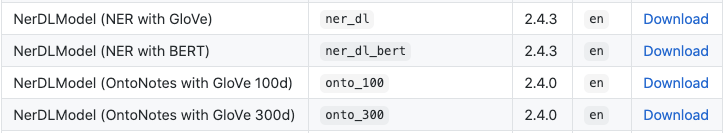

### Public NER (CoNLL 2003)

<p><strong>Named-Entity recognition</strong> is a well-known technique in information extraction it is also known as&nbsp;<strong>entity identification</strong>,&nbsp;<strong>entity chunking</strong>&nbsp;and&nbsp;<strong>entity extraction.</strong>&nbsp;Knowing the relevant tags for each article help in automatically categorizing the articles in defined hierarchies and enable smooth content discovery. 

Entities

``` PERSON, LOCATION, ORGANIZATION, MISC ```

In [ ]:
public_ner = NerDLModel.pretrained("ner_dl", 'en') \
                .setInputCols(["document", "token", "embeddings"]) \
                .setOutputCol("ner")

ner_dl download started this may take some time.
Approximate size to download 13.6 MB
[OK!]


In [ ]:
public_ner.extractParamMap()

{Param(parent='NerDLModel_d4424c9af5f4', name='includeAllConfidenceScores', doc='whether to include all confidence scores in annotation metadata or just the score of the predicted tag'): False,
 Param(parent='NerDLModel_d4424c9af5f4', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='NerDLModel_d4424c9af5f4', name='includeConfidence', doc='whether to include confidence scores in annotation metadata'): False,
 Param(parent='NerDLModel_d4424c9af5f4', name='batchSize', doc='Size of every batch'): 32,
 Param(parent='NerDLModel_d4424c9af5f4', name='classes', doc='get the tags used to trained this NerDLModel'): ['O',
  'B-ORG',
  'B-LOC',
  'B-PER',
  'I-PER',
  'I-ORG',
  'B-MISC',
  'I-LOC',
  'I-MISC'],
 Param(parent='NerDLModel_d4424c9af5f4', name='inputCols', doc='previous annotations columns, if renamed'): ['document',
  'token',
  'embeddings'],
 Param(parent='NerDLModel_d4424c9af5f4', name='outputCol', doc='output annot

In [ ]:
public_ner.getClasses()

['O', 'B-ORG', 'B-LOC', 'B-PER', 'I-PER', 'I-ORG', 'B-MISC', 'I-LOC', 'I-MISC']

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# ner_dl model is trained with glove_100d. So we use the same embeddings in the pipeline
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d').\
    setInputCols(["document", 'token']).\
    setOutputCol("embeddings")

nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               glove_embeddings,
                               public_ner])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))


glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.ner.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)

+------------+---------+
|       token|ner_label|
+------------+---------+
|      Unions|        O|
|representing|        O|
|     workers|        O|
|          at|        O|
|      Turner|    B-ORG|
|      Newall|    I-ORG|
|         say|        O|
|        they|        O|
|         are|        O|
|           '|        O|
|disappointed|        O|
|           '|        O|
|       after|        O|
|       talks|        O|
|        with|        O|
|    stricken|        O|
|      parent|        O|
|        firm|        O|
|     Federal|    B-ORG|
|       Mogul|    I-ORG|
|           .|        O|
|     TORONTO|    B-LOC|
|           ,|        O|
|      Canada|    B-LOC|
|           A|        O|
|      second|        O|
|        team|        O|
|          of|        O|
|  rocketeers|        O|
|   competing|        O|
|         for|        O|
|         the|        O|
|      #36;10|        O|
|     million|        O|
|      Ansari|   B-MISC|
|           X|   I-MISC|
|       Prize|   I-MISC|


### NerDL OntoNotes 100D

This pipeline is based on&nbsp;<strong>NerDLApproach</strong> annotator with <strong>Char CNN - BiLSTM</strong> and <strong>GloVe Embeddings</strong> on the <strong>OntoNotes</strong> corpus and supports the identification of 18 entities.</p><p>Following NER types are supported in this pipeline:</p><table><thead><tr><th>Type</th><th>Description</th></tr></thead><tbody><tr><td><code>PERSON</code></td><td>People, including fictional.</td></tr><tr><td><code>NORP</code></td><td>Nationalities or religious or political groups.</td></tr><tr><td><code>FAC</code></td><td>Buildings, airports, highways, bridges, etc.</td></tr><tr><td><code>ORG</code></td><td>Companies, agencies, institutions, etc.</td></tr><tr><td><code>GPE</code></td><td>Countries, cities, states.</td></tr><tr><td><code>LOC</code></td><td>Non-GPE locations, mountain ranges, bodies of water.</td></tr><tr><td><code>PRODUCT</code></td><td>Objects, vehicles, foods, etc. (Not services.)</td></tr><tr><td><code>EVENT</code></td><td>Named hurricanes, battles, wars, sports events, etc.</td></tr><tr><td><code>WORK_OF_ART</code></td><td>Titles of books, songs, etc.</td></tr><tr><td><code>LAW</code></td><td>Named documents made into laws.</td></tr><tr><td><code>LANGUAGE</code></td><td>Any named language.</td></tr><tr><td><code>DATE</code></td><td>Absolute or relative dates or periods.</td></tr><tr><td><code>TIME</code></td><td>Times smaller than a day.</td></tr><tr><td><code>PERCENT</code></td><td>Percentage, including &rdquo;%&ldquo;.</td></tr><tr><td><code>MONEY</code></td><td>Monetary values, including unit.</td></tr><tr><td><code>QUANTITY</code></td><td>Measurements, as of weight or distance.</td></tr><tr><td><code>ORDINAL</code></td><td>&ldquo;first&rdquo;, &ldquo;second&rdquo;, etc.</td></tr><tr><td><code>CARDINAL</code></td><td>Numerals that do not fall under another type.</td></tr></tbody></table>

Entities

``` 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART' ```

In [ ]:
onto_ner = NerDLModel.pretrained("onto_100", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               glove_embeddings,
                               onto_ner])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]


In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.ner.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)


+------------+-------------+
|       token|    ner_label|
+------------+-------------+
|      Unions|            O|
|representing|            O|
|     workers|            O|
|          at|            O|
|      Turner|        B-ORG|
|      Newall|        I-ORG|
|         say|            O|
|        they|            O|
|         are|            O|
|           '|            O|
|disappointed|            O|
|           '|            O|
|       after|            O|
|       talks|            O|
|        with|            O|
|    stricken|            O|
|      parent|            O|
|        firm|            O|
|     Federal|        B-ORG|
|       Mogul|        I-ORG|
|           .|            O|
|     TORONTO|        B-GPE|
|           ,|            O|
|      Canada|        B-GPE|
|           A|            O|
|      second|    B-ORDINAL|
|        team|            O|
|          of|            O|
|  rocketeers|            O|
|   competing|            O|
|         for|            O|
|         the|

### NER with Bert (CoNLL 2003)

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

bert_embeddings = BertEmbeddings.pretrained('bert_base_cased')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

onto_ner_bert = NerDLModel.pretrained("ner_dl_bert", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        bert_embeddings,
        onto_ner_bert
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

bert_base_cased download started this may take some time.
Approximate size to download 389.1 MB
[OK!]
ner_dl_bert download started this may take some time.
Approximate size to download 15.4 MB
[OK!]


In [ ]:
# fullAnnotate in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')

list(zip(light_result['token'], light_result['ner']))

[('Peter', 'I-PER'),
 ('Parker', 'I-PER'),
 ('is', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('persn', 'O'),
 ('and', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('New', 'I-LOC'),
 ('York', 'I-LOC'),
 ('.', 'O'),
 ('Bruce', 'I-PER'),
 ('Wayne', 'I-PER'),
 ('is', 'O'),
 ('also', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('guy', 'O'),
 ('and', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('Gotham', 'I-LOC'),
 ('City', 'I-LOC'),
 ('.', 'O')]

### Getting the NER chunks with NER Converter

In [ ]:
ner_converter = NerConverter() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        bert_embeddings,
        onto_ner_bert,
        ner_converter
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))


In [ ]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result, 
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-------------------------------------------+---------+
|chunk                                      |ner_label|
+-------------------------------------------+---------+
|Turner   Newall                            |ORG      |
|Federal Mogul                              |ORG      |
|TORONTO                                    |LOC      |
|Canada                                     |LOC      |
|Ansari X Prize                             |MISC     |
|University of Louisville                   |ORG      |
|Mike Fitzpatrick                           |PER      |
|Southern California's                      |LOC      |
|British Department for Education and Skills|ORG      |
|DfES                                       |ORG      |
|Netsky                                     |MISC     |
|Sasser                                     |MISC     |
|Sophos                                     |ORG      |
|Jaschan                                    |PER      |
|Germany                                    |LOC

In [ ]:
# fullAnnotate in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.fullAnnotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')


chunks = []
entities = []

for n in light_result[0]['ner_chunk']:
        
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    
    
import pandas as pd

df = pd.DataFrame({'chunks':chunks, 'entities':entities})

df

,chunks,entities
0,Peter Parker,PER
1,New York,LOC
2,Bruce Wayne,PER
3,Gotham City,LOC


### NER with BertForTokenClassification

[BertForTokenClassification](https://nlp.johnsnowlabs.com/docs/en/transformers#bertfortokenclassification) can load Bert Models with a token classification head on top (a linear layer on top of the hidden-states output) e.g. for Named-Entity-Recognition (NER) tasks.

For more examples of BertForTokenClassification models, please check [Transformers for Token Classification in Spark NLP notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/14.Transformers_for_Token_Classification_in_Spark_NLP.ipynb). 


Pretrained models can be loaded with `pretrained()` of the companion object. The default model is `"bert_base_token_classifier_conll03"`, if no name is provided. <br/><br/>

**Here are Bert Based Token Classification models available in Spark NLP:**

<br/>

| Title                                                                                                                        | Name                                          | Language   |
|:-----------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------|:-----------|
| BERT Token Classification - NER CoNLL (bert_base_token_classifier_conll03)                                                   | bert_base_token_classifier_conll03            | en         |
| BERT Token Classification - NER OntoNotes (bert_base_token_classifier_ontonote)                                              | bert_base_token_classifier_ontonote           | en         |
| BERT Token Classification Large - NER CoNLL (bert_large_token_classifier_conll03)                                            | bert_large_token_classifier_conll03           | en         |
| BERT Token Classification Large - NER OntoNotes (bert_large_token_classifier_ontonote)                                       | bert_large_token_classifier_ontonote          | en         |
| BERT Token Classification - ParsBERT for Persian Language Understanding (bert_token_classifier_parsbert_armanner)            | bert_token_classifier_parsbert_armanner       | fa         |
| BERT Token Classification - ParsBERT for Persian Language Understanding (bert_token_classifier_parsbert_ner)                 | bert_token_classifier_parsbert_ner            | fa         |
| BERT Token Classification - ParsBERT for Persian Language Understanding (bert_token_classifier_parsbert_peymaner)            | bert_token_classifier_parsbert_peymaner       | fa         |
| BERT Token Classification - BETO Spanish Language Understanding (bert_token_classifier_spanish_ner)                          | bert_token_classifier_spanish_ner             | es         |
| BERT Token Classification - Swedish Language Understanding (bert_token_classifier_swedish_ner)                               | bert_token_classifier_swedish_ner             | sv         |
| BERT Token Classification - Turkish Language Understanding (bert_token_classifier_turkish_ner)                               | bert_token_classifier_turkish_ner             | tr         |
| DistilBERT Token Classification - NER CoNLL (distilbert_base_token_classifier_conll03)                                       | distilbert_base_token_classifier_conll03      | en         |
| DistilBERT Token Classification - NER OntoNotes (distilbert_base_token_classifier_ontonotes)                                 | distilbert_base_token_classifier_ontonotes    | en         |
| DistilBERT Token Classification - DistilbertNER for Persian Language Understanding (distilbert_token_classifier_persian_ner) | distilbert_token_classifier_persian_ner       | fa         |
| BERT Token Classification -  Few-NERD (bert_base_token_classifier_few_nerd)                                                  | bert_base_token_classifier_few_nerd           | en         |
| DistilBERT Token Classification -  Few-NERD (distilbert_base_token_classifier_few_nerd)                                      | distilbert_base_token_classifier_few_nerd     | en         |
| Named Entity Recognition for Japanese (BertForTokenClassification)                                                           | bert_token_classifier_ner_ud_gsd              | ja         |
| Detect PHI for Deidentification (BertForTokenClassifier)                                                                     | bert_token_classifier_ner_deid                | en         |
| Detect Clinical Entities (BertForTokenClassifier)                                                                            | bert_token_classifier_ner_jsl                 | en         |
| Detect Drug Chemicals (BertForTokenClassifier)                                                                               | bert_token_classifier_ner_drugs               | en         |
| Detect Clinical Entities (Slim version, BertForTokenClassifier)                                                              | bert_token_classifier_ner_jsl_slim            | en         |
| ALBERT Token Classification Base - NER CoNLL (albert_base_token_classifier_conll03)                                          | albert_base_token_classifier_conll03          | en         |
| ALBERT Token Classification Large - NER CoNLL (albert_large_token_classifier_conll03)                                        | albert_large_token_classifier_conll03         | en         |
| ALBERT Token Classification XLarge - NER CoNLL (albert_xlarge_token_classifier_conll03)                                      | albert_xlarge_token_classifier_conll03        | en         |
| DistilRoBERTa Token Classification - NER OntoNotes (distilroberta_base_token_classifier_ontonotes)                           | distilroberta_base_token_classifier_ontonotes | en         |
| RoBERTa Token Classification Base - NER CoNLL (roberta_base_token_classifier_conll03)                                        | roberta_base_token_classifier_conll03         | en         |
| RoBERTa Token Classification Base - NER OntoNotes (roberta_base_token_classifier_ontonotes)                                  | roberta_base_token_classifier_ontonotes       | en         |
| RoBERTa Token Classification Large - NER CoNLL (roberta_large_token_classifier_conll03)                                      | roberta_large_token_classifier_conll03        | en         |
| RoBERTa Token Classification Large - NER OntoNotes (roberta_large_token_classifier_ontonotes)                                | roberta_large_token_classifier_ontonotes      | en         |
| RoBERTa Token Classification For Persian (roberta_token_classifier_zwnj_base_ner)                                            | roberta_token_classifier_zwnj_base_ner        | fa         |
| XLM-RoBERTa Token Classification Base - NER XTREME (xlm_roberta_token_classifier_ner_40_lang)                                | xlm_roberta_token_classifier_ner_40_lang      | xx         |
| XLNet Token Classification Base - NER CoNLL (xlnet_base_token_classifier_conll03)                                            | xlnet_base_token_classifier_conll03           | en         |
| XLNet Token Classification Large - NER CoNLL (xlnet_large_token_classifier_conll03)                                          | xlnet_large_token_classifier_conll03          | en         |
| Detect Adverse Drug Events (BertForTokenClassification)                                                                      | bert_token_classifier_ner_ade                 | en         |
| Detect Anatomical Regions (BertForTokenClassification)                                                                       | bert_token_classifier_ner_anatomy             | en         |
| Detect Bacterial Species (BertForTokenClassification)                                                                        | bert_token_classifier_ner_bacteria            | en         |
| XLM-RoBERTa Token Classification Base - NER CoNLL (xlm_roberta_base_token_classifier_conll03)                                | xlm_roberta_base_token_classifier_conll03     | en         |
| XLM-RoBERTa Token Classification Base - NER OntoNotes (xlm_roberta_base_token_classifier_ontonotes)                          | xlm_roberta_base_token_classifier_ontonotes   | en         |
| Longformer Token Classification Base - NER CoNLL (longformer_base_token_classifier_conll03)                                  | longformer_base_token_classifier_conll03      | en         |
| Longformer Token Classification Base - NER CoNLL (longformer_large_token_classifier_conll03)                                 | longformer_large_token_classifier_conll03     | en         |
| Detect Chemicals in Medical text (BertForTokenClassification)                                                                | bert_token_classifier_ner_chemicals           | en         |
| Detect Chemical Compounds and Genes (BertForTokenClassifier)                                                                 | bert_token_classifier_ner_chemprot            | en         |
| Detect Cancer Genetics (BertForTokenClassification)                                                                          | bert_token_classifier_ner_bionlp              | en         |
| Detect Cellular/Molecular Biology Entities (BertForTokenClassification)                                                      | bert_token_classifier_ner_cellular            | en         |
| Detect concepts in drug development trials (BertForTokenClassification)                                                      | bert_token_classifier_drug_development_trials | en         |
| Detect Cancer Genetics (BertForTokenClassification)                                                                          | bert_token_classifier_ner_bionlp              | en         |
| Detect Adverse Drug Events (BertForTokenClassification)                                                                      | bert_token_classifier_ner_ade                 | en         |
| Detect Anatomical Regions (MedicalBertForTokenClassifier)                                                                    | bert_token_classifier_ner_anatomy             | en         |
| Detect Cellular/Molecular Biology Entities (BertForTokenClassification)                                                      | bert_token_classifier_ner_cellular            | en         |
| Detect Chemicals in Medical text (BertForTokenClassification)                                                                | bert_token_classifier_ner_chemicals           | en         |
| Detect Chemical Compounds and Genes (BertForTokenClassifier)                                                                 | bert_token_classifier_ner_chemprot            | en         |
| Detect PHI for Deidentification (BertForTokenClassifier)                                                                     | bert_token_classifier_ner_deid                | en         |
| Detect Drug Chemicals (BertForTokenClassifier)                                                                               | bert_token_classifier_ner_drugs               | en         |
| Detect Clinical Entities (BertForTokenClassifier)                                                                            | bert_token_classifier_ner_jsl                 | en         |
| Detect Clinical Entities (Slim version, BertForTokenClassifier)                                                              | bert_token_classifier_ner_jsl_slim            | en         |
| Detect Bacterial Species (BertForTokenClassification)                                                                        | bert_token_classifier_ner_bacteria            | en         |

**You can find all these models and more [HERE](https://nlp.johnsnowlabs.com/models?edition=Spark+NLP)**

In [ ]:
# no need for token columns 
tokenClassifier = BertForTokenClassification.pretrained('bert_base_token_classifier_conll03', 'en') \
    .setInputCols('document',"token") \
    .setOutputCol("ner")

bert_base_token_classifier_conll03 download started this may take some time.
Approximate size to download 385.4 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        tokenClassifier,
        ner_converter
        ])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result.select(F.explode(F.arrays_zip(result.ner_chunk.result, 
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-------------------------------------------+---------+
|chunk                                      |ner_label|
+-------------------------------------------+---------+
|Turner   Newall                            |ORG      |
|Federal Mogul                              |ORG      |
|TORONTO                                    |LOC      |
|Canada                                     |LOC      |
|Ansari X Prize                             |MISC     |
|University of Louisville                   |ORG      |
|Mike Fitzpatrick                           |PER      |
|Southern California's                      |LOC      |
|British Department for Education and Skills|ORG      |
|DfES                                       |ORG      |
|Music Manifesto                            |MISC     |
|Netsky                                     |MISC     |
|Sasser                                     |MISC     |
|Sophos                                     |ORG      |
|Jaschan                                    |PER

### Multi-Lingual NER 
These NER Models are able to extract entities from a variety of languages


#### Multi-Lingual NER (XLM-RoBERTa)
[XlmRoBertaForTokenClassification](https://nlp.johnsnowlabs.com/docs/en/transformers#xlmrobertafortokenclassification) can load XLM-RoBERTa Models with a token classification head on top (a linear layer on top of the hidden-states output) e.g. for Named-Entity-Recognition (NER) tasks.




| Spark NLP Model Name                     | language   | predicted_entities                                     | Class   | Number of Languages supported                    |
|:-----------------------------------------|:-----------|:-------------------------------------------------------|:--------------------------------|:-----------------------|
| ner_wikiner_glove_840B_300               | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |8   |
| ner_wikiner_xlm_roberta_base             | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |8   |
| ner_xtreme_glove_840B_300                | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |40  |
| ner_xtreme_xlm_roberta_xtreme_base       | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |40  | 
| xlm_roberta_token_classifier_ner_40_lang | xx         | ['LOC', 'ORG', 'PER', 'O']                             | XlmRoBertaForTokenClassification |40  | 



In [ ]:
tokenClassifier = XlmRoBertaForTokenClassification() \
    .pretrained('xlm_roberta_token_classifier_ner_40_lang', 'xx') \
    .setInputCols(['token', 'document']) \
    .setOutputCol('ner')

xlm_roberta_token_classifier_ner_40_lang download started this may take some time.
Approximate size to download 921.6 MB
[OK!]


In [ ]:
from pyspark.sql.types import StringType
from pyspark.sql import functions as F

# No need for NER Converter
nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               tokenClassifier,])

text = [
'Peter Parker is a nice lad and lives in New York', 
'Das Schloss Charlottenburg in Berlin ist eines der schoensten Staedte in Deutschland sagen viele Menschen',
'Peter Parker est un gentil garçon et vit à New York',
'پیٹر پارکر ایک اچھا لڑکا ہے اور وہ نیو یارک میں رہتا ھے',
]
data_set = spark.createDataFrame(text, StringType()).toDF("text")
result = nlpPipeline.fit(data_set).transform(data_set)


result.select(F.explode(F.arrays_zip(result.token.result, 
                                     result.ner.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias('token'),
              F.expr("cols['1']").alias("ner_label")).show(100,truncate=False)

+--------------+---------+
|token         |ner_label|
+--------------+---------+
|Peter         |PER      |
|Parker        |PER      |
|is            |O        |
|a             |O        |
|nice          |O        |
|lad           |O        |
|and           |O        |
|lives         |O        |
|in            |O        |
|New           |LOC      |
|York          |LOC      |
|Das           |O        |
|Schloss       |ORG      |
|Charlottenburg|ORG      |
|in            |O        |
|Berlin        |LOC      |
|ist           |O        |
|eines         |O        |
|der           |O        |
|schoensten    |O        |
|Staedte       |O        |
|in            |O        |
|Deutschland   |LOC      |
|sagen         |O        |
|viele         |O        |
|Menschen      |O        |
|Peter         |PER      |
|Parker        |PER      |
|est           |O        |
|un            |O        |
|gentil        |O        |
|garçon        |O        |
|et            |O        |
|vit           |O        |
|

## Highlight the entities

In [ ]:
# Install spark-nlp-display
! pip install -q spark-nlp-display

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('recognize_entities_dl', lang='en')

recognize_entities_dl download started this may take some time.
Approx size to download 160.1 MB
[OK!]


In [ ]:
ann_text = pipeline.fullAnnotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')[0]
ann_text.keys()

dict_keys(['entities', 'document', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()
visualiser.display(ann_text, label_col='entities', document_col='document')

# Change color of an entity label
visualiser.set_label_colors({'LOC':'#008080', 'PER':'#800080'})
visualiser.display(ann_text, label_col='entities')

# Set label filter
visualiser.display(ann_text, label_col='entities', document_col='document',
                   labels=['PER'])

print ('\nColor code for label: \n"LOC": {}\n"PER": {}' .format(visualiser.get_label_color('LOC'),visualiser.get_label_color('PER')) )


Color code for label: 
"LOC": #008080
"PER": #800080


## Using Pretrained ClassifierDL and SentimentDL models

| Name                                                                                | Spark NLP Model Reference                  | Language   |
|:------------------------------------------------------------------------------------|:-------------------------------------------|:-----------|
| TREC(50) Question Classifier                                                        | classifierdl_use_trec50                    | en         |
| TREC(6) Question Classifier                                                         | classifierdl_use_trec6                     | en         |
| Cyberbullying Classifier                                                            | classifierdl_use_cyberbullying             | en         |
| Emotion Detection Classifier                                                        | Emotion Classifier                         | en         |
| Fake News Classifier                                                                | classifierdl_use_fakenews                  | en         |
| Sarcasm Classifier                                                                  | classifierdl_use_sarcasm                   | en         |
| Spam Classifier                                                                     | classifierdl_use_spam                      | en         |
| Classifier for Adverse Drug Events                                                  | classifierdl_ade_biobert                   | en         |
| PICO Classifier                                                                     | classifierdl_pico_biobert                  | en         |
| Classifier for Genders - BIOBERT                                                    | classifierdl_gender_biobert                | en         |
| Classifier for Genders - SBERT                                                      | classifierdl_gender_sbert                  | en         |
| TREC(50) Question Classifier                                                        | classifierdl_use_trec50                    | en         |
| TREC(6) Question Classifier                                                         | classifierdl_use_trec6                     | en         |
| Cyberbullying Classifier                                                            | classifierdl_use_cyberbullying             | en         |
| Emotion Detection Classifier                                                        | classifierdl_use_emotion                   | en         |
| Fake News Classifier                                                                | classifierdl_use_fakenews                  | en         |
| Sarcasm Classifier                                                                  | classifierdl_use_sarcasm                   | en         |
| Spam Classifier                                                                     | classifierdl_use_spam                      | en         |
| Classifier for Adverse Drug Events                                                  | classifierdl_ade_biobert                   | en         |
| Classifier for Adverse Drug Events using Clinical Bert                              | classifierdl_ade_clinicalbert              | en         |
| Classifier for Adverse Drug Events in Small Conversations                           | classifierdl_ade_conversational_biobert    | en         |
| Classifier for Genders - BIOBERT                                                    | classifierdl_gender_biobert                | en         |
| Classifier for Genders - SBERT                                                      | classifierdl_gender_sbert                  | en         |
| PICO Classifier                                                                     | classifierdl_pico_biobert                  | en         |
| End-to-End (E2E) and data-driven NLG Challenge                                      | multiclassifierdl_use_e2e                  | en         |
| Toxic Comment Classification                                                        | multiclassifierdl_use_toxic                | en         |
| Toxic Comment Classification - Small                                                | multiclassifierdl_use_toxic_sm             | en         |
| Intent Classification for Airline Traffic Information System queries (ATIS dataset) | classifierdl_use_atis                      | en         |
| Identify intent in general text - SNIPS dataset                                     | classifierdl_use_snips                     | en         |
| News Classifier of Turkish text                                                     | classifierdl_bert_news                     | tr         |
| News Classifier of German text                                                      | classifierdl_bert_news                     | de         |
| Cyberbullying Classifier in Turkish texts.                                          | classifierdl_berturk_cyberbullying         | tr         |
| Question Pair Classifier                                                            | classifierdl_electra_questionpair          | en         |
| Question Pair Classifier Pipeline                                                   | classifierdl_electra_questionpair_pipeline | en         |
| News Classifier Pipeline for Turkish text                                           | classifierdl_bert_news_pipeline            | tr         |

In [ ]:
fake_classifier = ClassifierDLModel.pretrained('classifierdl_use_fakenews', 'en') \
                      .setInputCols(["document", "sentence_embeddings"]) \
                      .setOutputCol("class")

classifierdl_use_fakenews download started this may take some time.
Approximate size to download 21.4 MB
[OK!]


fake_news classifier is trained on `https://raw.githubusercontent.com/joolsa/fake_real_news_dataset/master/fake_or_real_news.csv.zip`

In [ ]:
fake_classifier.getClasses()

['FAKE', 'REAL']

In [ ]:
documentAssembler = DocumentAssembler()\
                      .setInputCol("text")\
                      .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained(lang="en") \
          .setInputCols(["document"])\
          .setOutputCol("sentence_embeddings")

nlpPipeline = Pipeline(stages=[documentAssembler, 
                               use,
                               fake_classifier])

empty_data = spark.createDataFrame([[""]]).toDF("text")

fake_clf_model = nlpPipeline.fit(empty_data)


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/spam_ham_dataset.csv

In [ ]:
fake_lp_pipeline = LightPipeline(fake_clf_model)

text = 'BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump'

fake_lp_pipeline.annotate(text)

{'document': ['BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump'],
 'sentence_embeddings': ['BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump'],
 'class': ['FAKE']}

In [ ]:
sample_data = spark.createDataFrame([[text]]).toDF("text")

sample_data.show(truncate=False)

+-------------------------------------------------------------------------------------------------+
|text                                                                                             |
+-------------------------------------------------------------------------------------------------+
|BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump|
+-------------------------------------------------------------------------------------------------+



In [ ]:
pred = fake_clf_model.transform(sample_data)

pred.show()

+--------------------+--------------------+--------------------+--------------------+
|                text|            document| sentence_embeddings|               class|
+--------------------+--------------------+--------------------+--------------------+
|BREAKING: Leaked ...|[{document, 0, 96...|[{sentence_embedd...|[{category, 0, 96...|
+--------------------+--------------------+--------------------+--------------------+



In [ ]:
pred.select('text','class.result').show(truncate=False)

+-------------------------------------------------------------------------------------------------+------+
|text                                                                                             |result|
+-------------------------------------------------------------------------------------------------+------+
|BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump|[FAKE]|
+-------------------------------------------------------------------------------------------------+------+



you can find more samples here >> `https://github.com/KaiDMML/FakeNewsNet/tree/master/dataset`


In [ ]:
fake_lp_pipeline = LightPipeline(fake_clf_model)

text = "Joseph Robinette Biden Jr. is an American politician who is the 46th and current president of the United States."

fake_lp_pipeline.annotate(text)


{'document': ['Joseph Robinette Biden Jr. is an American politician who is the 46th and current president of the United States.'],
 'sentence_embeddings': ['Joseph Robinette Biden Jr. is an American politician who is the 46th and current president of the United States.'],
 'class': ['REAL']}

## Generic classifier function

In [ ]:
def get_clf_lp(model_name, sentiment_dl=False, pretrained=True):

  documentAssembler = DocumentAssembler()\
        .setInputCol("text")\
        .setOutputCol("document")

  use = UniversalSentenceEncoder.pretrained(lang="en") \
        .setInputCols(["document"])\
        .setOutputCol("sentence_embeddings")


  if pretrained:

    if sentiment_dl:

      document_classifier = SentimentDLModel.pretrained(model_name, 'en') \
            .setInputCols(["document", "sentence_embeddings"]) \
            .setOutputCol("class")
    else:
      document_classifier = ClassifierDLModel.pretrained(model_name, 'en') \
            .setInputCols(["document", "sentence_embeddings"]) \
            .setOutputCol("class")

  else:

    if sentiment_dl:

      document_classifier = SentimentDLModel.load(model_name) \
            .setInputCols(["document", "sentence_embeddings"]) \
            .setOutputCol("class")
    else:
      document_classifier = ClassifierDLModel.load(model_name) \
            .setInputCols(["document", "sentence_embeddings"]) \
            .setOutputCol("class")

  print ('classes:',document_classifier.getClasses())

  nlpPipeline = Pipeline(stages=[
                                documentAssembler, 
                                use,
                                document_classifier
                                ])

  empty_data = spark.createDataFrame([[""]]).toDF("text")

  clf_pipelineFit = nlpPipeline.fit(empty_data)

  clf_lp_pipeline = LightPipeline(clf_pipelineFit)

  return clf_lp_pipeline

In [ ]:
clf_lp_pipeline = get_clf_lp('classifierdl_use_trec50')

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_trec50 download started this may take some time.
Approximate size to download 21.2 MB
[OK!]
classes: [' ENTY_color', ' ENTY_techmeth', ' DESC_manner', ' NUM_volsize', ' ENTY_letter', ' NUM_temp', ' ENTY_body', ' NUM_count', ' ENTY_instru', ' NUM_period', ' NUM_speed', ' DESC_reason', ' ENTY_symbol', ' ENTY_event', ' HUM_desc', ' NUM_perc', ' ENTY_dismed', ' NUM_ord', ' HUM_gr', ' LOC_mount', ' ABBR_abb', ' DESC_desc', ' NUM_dist', ' HUM_title', ' ENTY_lang', ' ENTY_sport', ' ENTY_plant', ' NUM_code', ' NUM_other', ' ENTY_word', ' ENTY_animal', ' ENTY_substance', ' ENTY_veh', ' ENTY_product', ' LOC_state', ' ENTY_religion', ' ENTY_currency', ' NUM_date', ' LOC_country', ' ENTY_cremat', ' NUM_money', ' LOC_other', ' DESC_def', ' LOC_city', ' HUM_ind', ' ENTY_other', ' ENTY_termeq', ' ENTY_food', ' ABBR_exp', ' NUM_weight']


trained on the TREC datasets:

Classify open-domain, fact-based questions into one of the following broad semantic categories: 

```Abbreviation, Description, Entities, Human Beings, Locations or Numeric Values.```

In [ ]:
text = 'What was the number of member nations of the U.N. in 2000?'

clf_lp_pipeline.annotate(text)['class']

[' NUM_count']

In [ ]:
clf_lp_pipeline.fullAnnotate(text)[0]['class'][0].result

' NUM_count'

In [ ]:
clf_lp_pipeline.fullAnnotate(text)[0]['class'][0].metadata

{' ENTY_dismed': '3.768739E-22',
 ' ENTY_product': '2.4015744E-24',
 ' ENTY_techmeth': '1.5787039E-22',
 ' NUM_speed': '7.948464E-23',
 ' NUM_volsize': '2.5315113E-25',
 ' LOC_state': '6.3784123E-25',
 ' NUM_code': '1.4549451E-25',
 ' NUM_count': '0.9992601',
 ' ENTY_food': '1.3031208E-24',
 ' ENTY_animal': '1.6743833E-24',
 ' NUM_period': '6.8075115E-21',
 ' ENTY_religion': '5.9194734E-23',
 ' LOC_country': '5.3062683E-21',
 ' LOC_mount': '3.2177816E-25',
 ' ENTY_termeq': '9.790085E-26',
 ' ENTY_color': '1.1446835E-22',
 ' ENTY_lang': '6.333391E-24',
 ' ENTY_sport': '8.0773835E-25',
 ' DESC_def': '2.4284432E-27',
 ' HUM_gr': '4.4863106E-21',
 ' ENTY_symbol': '4.1271923E-25',
 ' ENTY_currency': '8.156541E-29',
 ' ENTY_veh': '5.414701E-22',
 ' LOC_other': '5.5141072E-11',
 ' ENTY_word': '5.3265024E-23',
 ' NUM_temp': '2.0907158E-23',
 ' NUM_dist': '1.2542656E-24',
 ' DESC_desc': '1.0926973E-12',
 ' DESC_manner': '9.258374E-23',
 ' NUM_ord': '2.2395288E-25',
 ' NUM_other': '3.9771262E-27

In [ ]:
text = 'What animal was the first mammal successfully cloned from adult cells?'

clf_lp_pipeline.annotate(text)['class']

[' HUM_ind']

In [ ]:
clf_lp_pipeline = get_clf_lp('classifierdl_use_cyberbullying')


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_cyberbullying download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
classes: ['sexism', 'neutral', 'racism']


In [ ]:
text ='RT @EBeisner @ahall012 I agree with you!! I would rather brush my teeth with sandpaper then watch football with a girl!!'

clf_lp_pipeline.annotate(text)['class']

['sexism']

In [ ]:
clf_lp_pipeline = get_clf_lp('classifierdl_use_fakenews')


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_fakenews download started this may take some time.
Approximate size to download 21.4 MB
[OK!]
classes: ['FAKE', 'REAL']


In [ ]:
text ='Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusation that Donald Trump is a KGB spy is about as weak and baseless a claim as a Salem witch hunt or McCarthy era trial. It’s only because Hillary Clinton is losing that she is lobbing conspiracy theory. Citizen Quasar The way I see it, one of two things will happen: 1. Trump will win by a landslide but the election will be stolen via electronic voting, just like I have been predicting for over a decade, and the American People will accept the skewed election results just like they accept the TSA into their crotches. 2. Somebody will bust a cap in Hillary’s @$$ killing her and the election will be postponed. Follow AMTV!'

clf_lp_pipeline.annotate(text)['class']


['FAKE']

In [ ]:
text ='Sen. Marco Rubio (R-Fla.) is adding a veteran New Hampshire political operative to his team as he continues mulling a possible 2016 presidential bid, the latest sign that he is seriously preparing to launch a campaign later this year.Jim Merrill, who worked for former GOP presidential nominee Mitt Romney and ran his 2008 and 2012 New Hampshire primary campaigns, joined Rubio’s fledgling campaign on Monday, aides to the senator said.Merrill will be joining Rubio’s Reclaim America PAC to focus on Rubio’s New Hampshire and broader Northeast political operations."Marco has always been well received in New Hampshire, and should he run for president, he would be very competitive there," Terry Sullivan, who runs Reclaim America, said in a statement. "Jim certainly knows how to win in New Hampshire and in the Northeast, and will be a great addition to our team at Reclaim America.”News of Merrill’s hire was first reported by The New York Times.'

clf_lp_pipeline.annotate(text)['class']

['REAL']

In [ ]:
sentiment_lp_pipeline = get_clf_lp('sentimentdl_use_twitter', sentiment_dl=True)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[OK!]
classes: ['positive', 'negative']


In [ ]:
text ='I am SO happy the news came out in time for my birthday this weekend! My inner 7-year-old cannot WAIT!'

sentiment_lp_pipeline.annotate(text)['class']

['positive']

In [ ]:
sentiment_lp_pipeline = get_clf_lp('classifierdl_use_emotion', sentiment_dl=False)


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
classes: ['joy', 'fear', 'surprise', 'sadness']


In [ ]:
sentiment_lp_pipeline.annotate(text)['class']

['surprise']